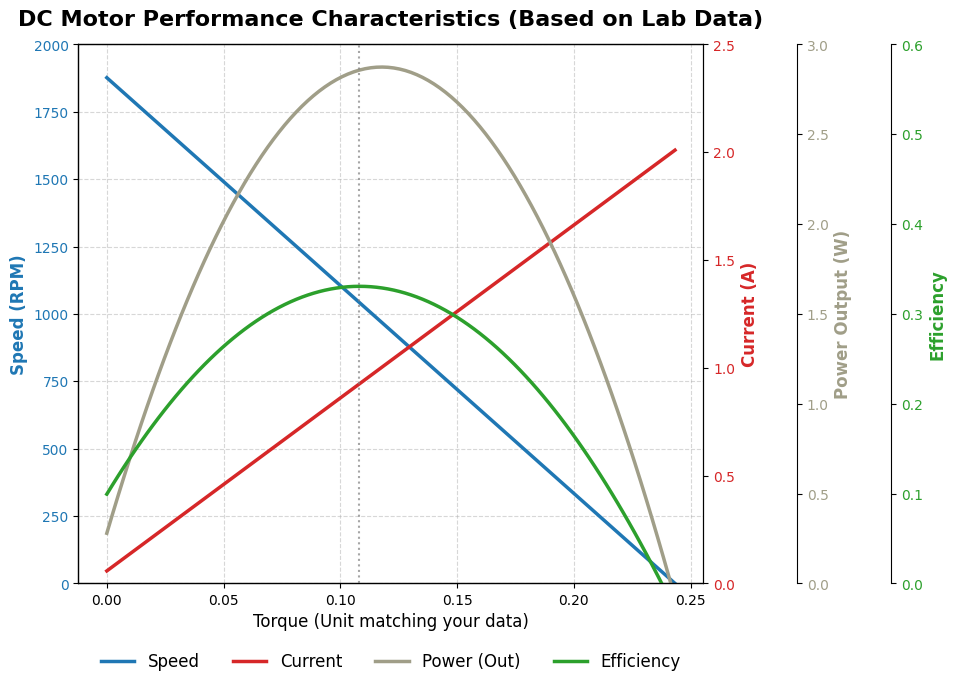

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1. Data Setup (ข้อมูลจากตารางของคุณ)
# คัดเลือกเฉพาะจุดที่มีการเปลี่ยนแปลงของ Torque เพื่อให้กราฟวาดได้ถูกต้อง
# Data points: [Duty 60%, Duty 80%, Duty 100%] + [Interpolated No Load]
# หมายเหตุ: ผมรวมจุด No Load (Torque=0) เข้าไปเพื่อให้กราฟสมบูรณ์

# Torque (g.cm or N.m dependent on your unit, assuming unit consistent with x-axis)
# ค่า x (Torque)
x_data = np.array([0, 0.0503, 0.13, 0.2433])

# Speed (RPM)
y_speed = np.array([1876.67, 1488.48, 874.06, 0])

# Current (Amp) - แปลงจากข้อมูลดิบให้เป็นหน่วยเดียวกัน
y_current = np.array([0.058, 0.462, 1.10, 2.01])

# Power Out (Watt) - แก้ไขค่าที่ Duty 40 (Torque 0) ให้เป็น 0 ตามหลักฟิสิกส์
y_power = np.array([0, 2.598, 2.467, 0])

# Efficiency (%) - ข้อมูลดิบดูเหมือนจะเป็นค่าทศนิยม (เช่น 0.46 คือ 46%) หรือค่าจริงต่ำมาก
# ผมจะสมมติว่าพล็อตตามค่าจริงที่ให้มา
y_eff = np.array([0, 0.4688, 0.1867, 0])

# 2. Curve Fitting (สร้างเส้นสมูท)
# สร้างจุด x ละเอียดๆ สำหรับวาดเส้นโค้ง (0 ถึง max torque)
x_smooth = np.linspace(0, 0.2433, 100)

# Fit: Speed (Linear - เส้นตรงลง)
z_speed = np.polyfit(x_data, y_speed, 1)
p_speed = np.poly1d(z_speed)

# Fit: Current (Linear - เส้นตรงขึ้น)
z_current = np.polyfit(x_data, y_current, 1)
p_current = np.poly1d(z_current)

# Fit: Power (Polynomial deg 2 - โค้งระฆังคว่ำ)
z_power = np.polyfit(x_data, y_power, 2)
p_power = np.poly1d(z_power)

# Fit: Efficiency (Polynomial deg 3 - โค้งเบ้)
# เนื่องจากข้อมูล Efficiency มีน้อย การ fit อาจจะไม่แม่นยำมาก แต่จะพยายามให้เป็นทรงระฆัง
z_eff = np.polyfit(x_data, y_eff, 2)
p_eff = np.poly1d(z_eff)

# 3. Plotting Configuration
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75) # เว้นที่ด้านขวาสำหรับแกนเพิ่มเติม

# Main Title
plt.title("DC Motor Performance Characteristics (Based on Lab Data)", fontsize=16, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- Axis 1: Speed (Blue) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Unit matching your data)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(x_smooth, p_speed(x_smooth), color=color1, linewidth=2.5, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 2000)

# --- Axis 2: Current (Red) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(x_smooth, p_current(x_smooth), color=color2, linewidth=2.5, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 2.5)

# --- Axis 3: Power (Gray/Brown) ---
ax3 = ax1.twinx()
color3 = '#A09E88' # สีเทาอมน้ำตาลตามรูปตัวอย่าง
# ขยับแกนออกไปด้านขวา
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(x_smooth, p_power(x_smooth), color=color3, linewidth=2.5, label='Power (Out)')
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_ylim(0, 3.0)

# --- Axis 4: Efficiency (Green) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
# ขยับแกนออกไปด้านขวาอีก
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency', color=color4, fontsize=12, weight='bold')
ax4.plot(x_smooth, p_eff(x_smooth), color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 0.6) # ปรับตามค่า Max ของข้อมูลคุณ

# --- Adding Reference Lines (Optional: Max Efficiency Point) ---
# หาจุด Max Efficiency
max_eff_idx = np.argmax(p_eff(x_smooth))
max_eff_x = x_smooth[max_eff_idx]
plt.axvline(x=max_eff_x, color='gray', linestyle=':', alpha=0.7)

# Legend รวม
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, fontsize=12)

plt.show()

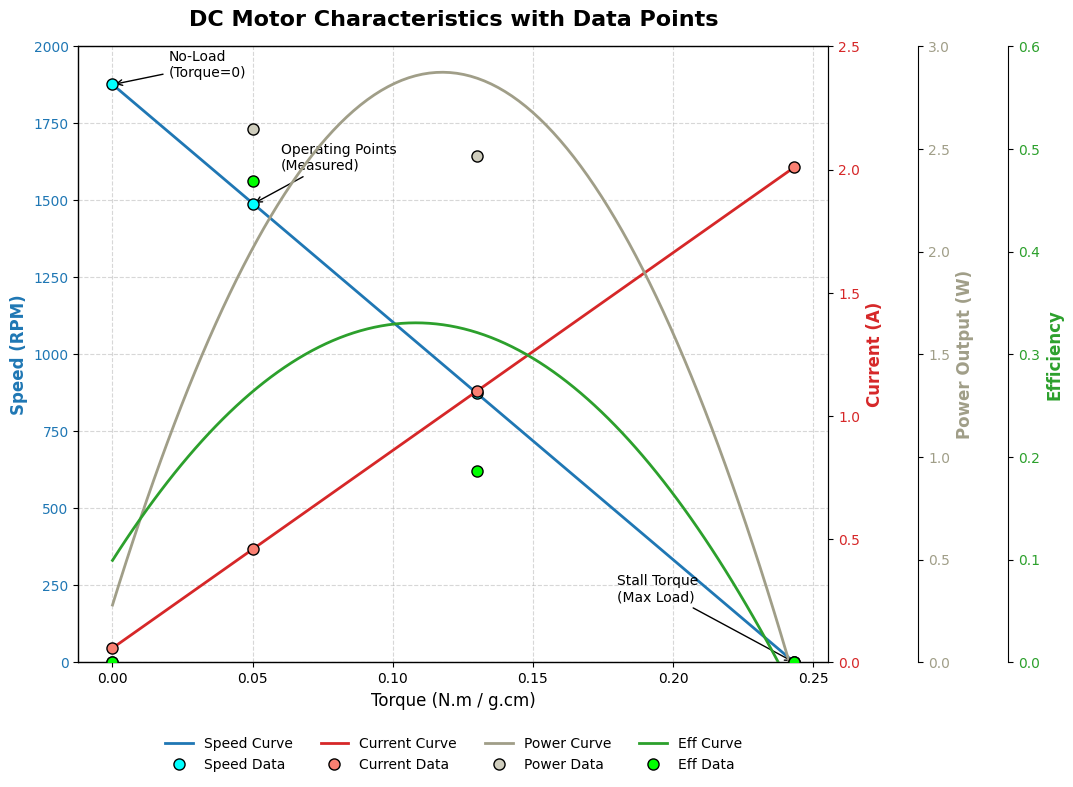

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# --- 1. Data Setup (ข้อมูลเดิมของคุณ) ---
# x = Torque
x_data = np.array([0, 0.0503, 0.13, 0.2433])

# y = Speed, Current, Power, Efficiency
y_speed = np.array([1876.67, 1488.48, 874.06, 0])
y_current = np.array([0.058, 0.462, 1.10, 2.01])
y_power = np.array([0, 2.598, 2.467, 0])
y_eff = np.array([0, 0.4688, 0.1867, 0])

# --- 2. Curve Fitting (สร้างเส้นสมูทเหมือนเดิม) ---
x_smooth = np.linspace(0, 0.2433, 100)

z_speed = np.polyfit(x_data, y_speed, 1)
p_speed = np.poly1d(z_speed)

z_current = np.polyfit(x_data, y_current, 1)
p_current = np.poly1d(z_current)

z_power = np.polyfit(x_data, y_power, 2)
p_power = np.poly1d(z_power)

z_eff = np.polyfit(x_data, y_eff, 2)
p_eff = np.poly1d(z_eff)

# --- 3. Plotting Configuration ---
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(right=0.75)

plt.title("DC Motor Characteristics with Data Points", fontsize=16, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Marker Style Settings (ตั้งค่าจุดวงกลมให้เด่น)
marker_style = dict(marker='o', linestyle='None', markersize=8, markeredgecolor='black', markeredgewidth=1, zorder=10)

# --- Axis 1: Speed (Blue) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (N.m / g.cm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
# วาดเส้น
ax1.plot(x_smooth, p_speed(x_smooth), color=color1, linewidth=2, label='Speed Curve')
# วาดจุดจริง (Scatter)
ax1.plot(x_data, y_speed, color='cyan', label='Speed Data', **marker_style)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 2000)

# --- Axis 2: Current (Red) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(x_smooth, p_current(x_smooth), color=color2, linewidth=2, label='Current Curve')
ax2.plot(x_data, y_current, color='salmon', label='Current Data', **marker_style)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 2.5)

# --- Axis 3: Power (Gray/Brown) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.12))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(x_smooth, p_power(x_smooth), color=color3, linewidth=2, label='Power Curve')
ax3.plot(x_data, y_power, color='#CFCDBD', label='Power Data', **marker_style)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_ylim(0, 3.0)

# --- Axis 4: Efficiency (Green) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.24))
ax4.set_ylabel('Efficiency', color=color4, fontsize=12, weight='bold')
ax4.plot(x_smooth, p_eff(x_smooth), color=color4, linewidth=2, label='Eff Curve')
ax4.plot(x_data, y_eff, color='lime', label='Eff Data', **marker_style)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 0.6)

# --- Annotations (ชี้บอกตำแหน่งสำคัญ) ---
# No-Load
ax1.annotate('No-Load\n(Torque=0)', xy=(0, 1876), xytext=(0.02, 1900),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Operating Points (ตัวอย่างจุดกลางๆ)
ax1.annotate('Operating Points\n(Measured)', xy=(0.05, 1488), xytext=(0.06, 1600),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Stall
ax1.annotate('Stall Torque\n(Max Load)', xy=(0.2433, 0), xytext=(0.18, 200),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Legend (รวมทุกอย่าง)
# รวบรวม Handles จากทุกแกน
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines_4, labels_4 = ax4.get_legend_handles_labels()

# เลือกมาโชว์เฉพาะที่เป็นจุด Data หรือ เส้นหลักตามต้องการ
all_lines = lines_1 + lines_2 + lines_3 + lines_4
all_labels = labels_1 + labels_2 + labels_3 + labels_4

# แสดง Legend ด้านล่าง
ax1.legend(all_lines, all_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, fontsize=10)

plt.show()

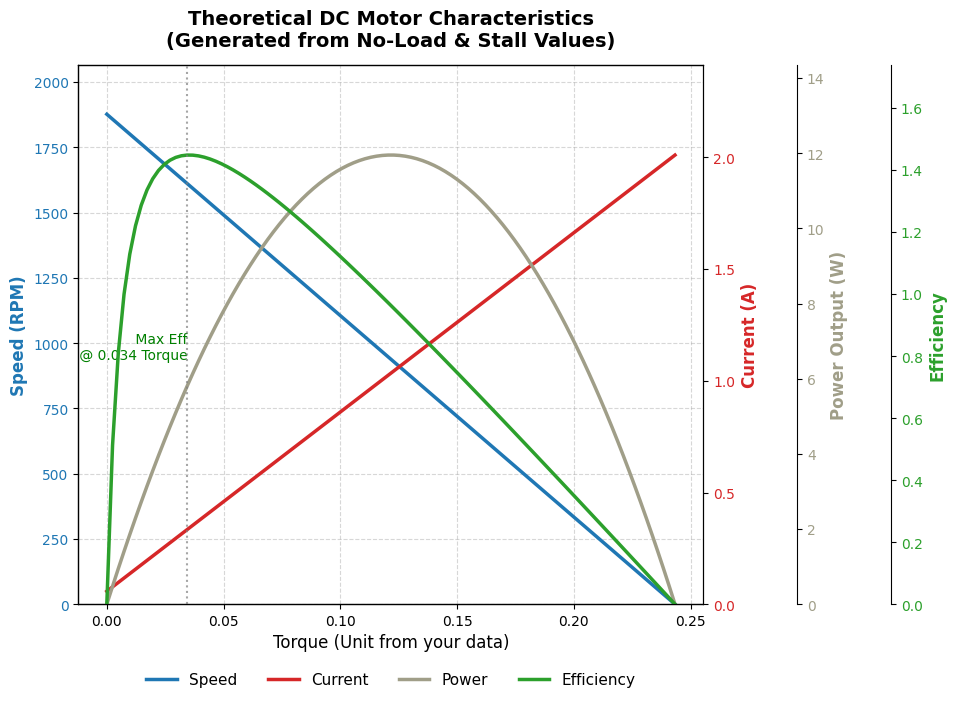

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup (กำหนดค่าแค่ ต้นทาง และ ปลายทาง)
# ข้อมูลจาก Lab ของคุณ (ค่าที่ขอบเขต)
w_nl_rpm = 1876.67   # No-Load Speed (RPM)
i_nl = 0.058         # No-Load Current (A)

t_st = 0.2433        # Stall Torque (สมมติหน่วย N.m หรือตาม data คุณ)
i_st = 2.01          # Stall Current (A)

# *สำคัญ* ต้องกำหนดแรงดันไฟ (V) เพื่อคำนวณ Efficiency (Pin = V * i)
# ผมคำนวณย้อนกลับจากข้อมูลเก่าคุณ (P_in ที่ Stall ~ 2A * 12V = 24W)
v_in = 12.0

# 2. Generate Theoretical Data (สร้าง 100 จุดตามสมการ)
# สร้างแกน x (Torque) จาก 0 ถึง Stall
t = np.linspace(0, t_st, 100)

# --- Equation 1: Speed (Linear equation) ---
# จากรูป: w = ((0 - w_nl)/t_st) * t + w_nl
# หรือสมการเส้นตรง y = mx + c ธรรมดา (Speed ลดลงเมื่อ Torque เพิ่ม)
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# --- Equation 2: Current (Linear equation) ---
# จากรูป: i = ((i_st - i_nl)/t_st) * t + i_nl
# กระแสเพิ่มขึ้นเมื่อ Torque เพิ่ม
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# --- Equation 3: Power Output (Parabola) ---
# จากรูป: P = Speed * Torque
# *ต้องแปลงหน่วย Speed จาก RPM เป็น Rad/s ก่อนคูณ เพื่อให้ได้หน่วย Watt ที่ถูกต้องตามฟิสิกส์*
# Factor: 2 * pi / 60 = 0.10472
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# --- Equation 4: Efficiency ---
# eff = P_out / P_in
# P_in = V * I
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) # ป้องกันหาร 0

# 3. Plotting (พล็อตกราฟ)
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75) # เว้นที่ขวาให้แกน

plt.title(f"Theoretical DC Motor Characteristics\n(Generated from No-Load & Stall Values)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Unit from your data)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2.5, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, w_nl_rpm * 1.1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2.5, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.2)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2.5, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_ylim(0, max(power_curve) * 1.2)

# Axis 4: Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, max(eff_curve) * 1.2) # ปรับสเกลตามค่าจริง

# แสดงจุด Max Efficiency
max_eff_idx = np.argmax(eff_curve)
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax1.text(t[max_eff_idx], w_nl_rpm/2, f' Max Eff\n @ {t[max_eff_idx]:.3f} Torque', color='green', ha='right')

# Legend
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, fontsize=11)

plt.show()

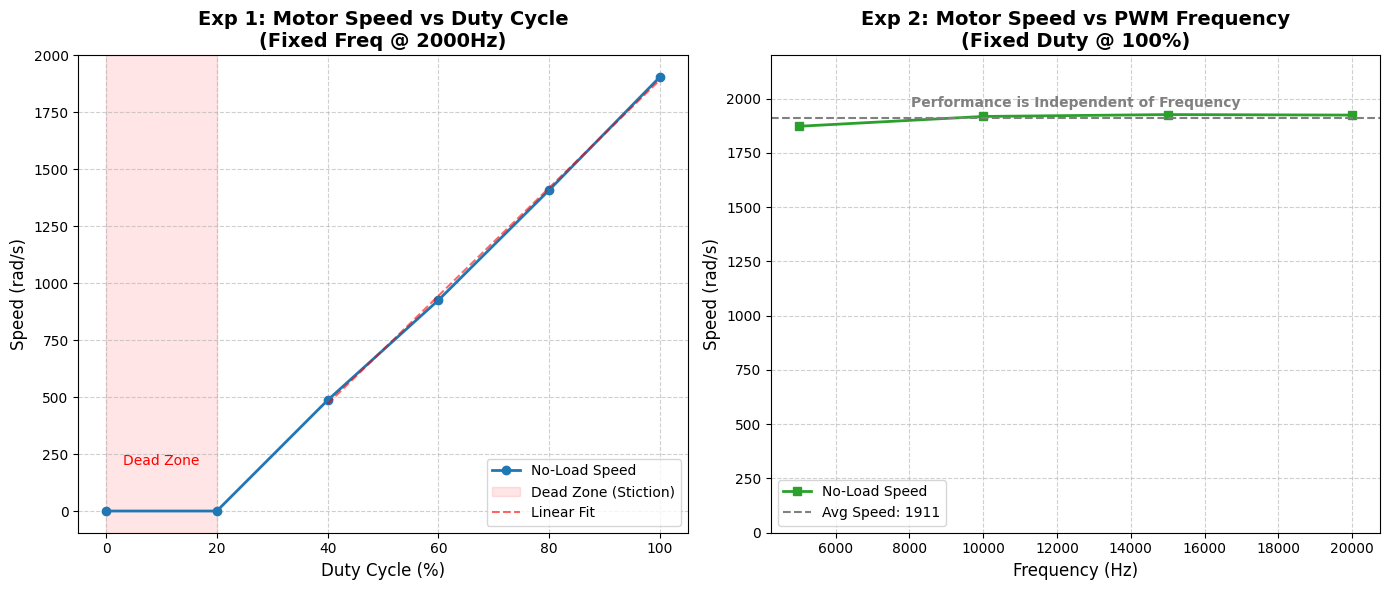

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data Setup (ดึงค่า Average จากตารางของคุณ) ---

# Set 1: Varying Duty Cycle (Fixed Freq 2000Hz)
# Duty Value: 0, 13108, 26216, 39324, 52432, 65540 -> แปลงเป็น %
duty_values = np.array([0, 13108, 26216, 39324, 52432, 65540])
duty_percent = (duty_values / 65540) * 100
# Omega No Load (Avg)
speed_duty_vary = np.array([0, 0, 486.33, 925.33, 1408.67, 1905.33])

# Set 2: Varying Frequency (Fixed Duty 100%)
# Frequency: 5000, 10000, 15000, 20000 (ตัด 0 ออกเพราะเป็นจุดหยุด)
freq_values = np.array([5000, 10000, 15000, 20000])
# Omega No Load (Avg)
speed_freq_vary = np.array([1873.00, 1918.33, 1927.00, 1924.67])


# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Duty Cycle vs Speed (Control Linearity)
ax1.set_title("Exp 1: Motor Speed vs Duty Cycle\n(Fixed Freq @ 2000Hz)", fontsize=14, weight='bold')
ax1.plot(duty_percent, speed_duty_vary, marker='o', color='tab:blue', linewidth=2, label='No-Load Speed')
ax1.set_xlabel('Duty Cycle (%)', fontsize=12)
ax1.set_ylabel('Speed (rad/s)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Highlight Dead Zone
ax1.axvspan(0, 20, color='red', alpha=0.1, label='Dead Zone (Stiction)')
ax1.text(10, 200, 'Dead Zone', color='red', ha='center')

# Linear Trend Line (เฉพาะช่วงที่หมุน 40-100%)
z = np.polyfit(duty_percent[2:], speed_duty_vary[2:], 1)
p = np.poly1d(z)
ax1.plot(duty_percent[2:], p(duty_percent[2:]), "r--", alpha=0.6, label='Linear Fit')
ax1.legend()


# Graph 2: Frequency vs Speed (Stability Check)
ax2.set_title("Exp 2: Motor Speed vs PWM Frequency\n(Fixed Duty @ 100%)", fontsize=14, weight='bold')
ax2.plot(freq_values, speed_freq_vary, marker='s', color='tab:green', linewidth=2, label='No-Load Speed')
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Speed (rad/s)', fontsize=12)
ax2.set_ylim(0, 2200) # ตั้งแกน Y ให้เห็นภาพรวมว่ามันสูงคงที่
ax2.grid(True, linestyle='--', alpha=0.6)

# Mean Line
mean_speed = np.mean(speed_freq_vary)
ax2.axhline(mean_speed, color='gray', linestyle='--', label=f'Avg Speed: {mean_speed:.0f}')
ax2.text(12500, mean_speed + 50, 'Performance is Independent of Frequency', color='gray', ha='center', weight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

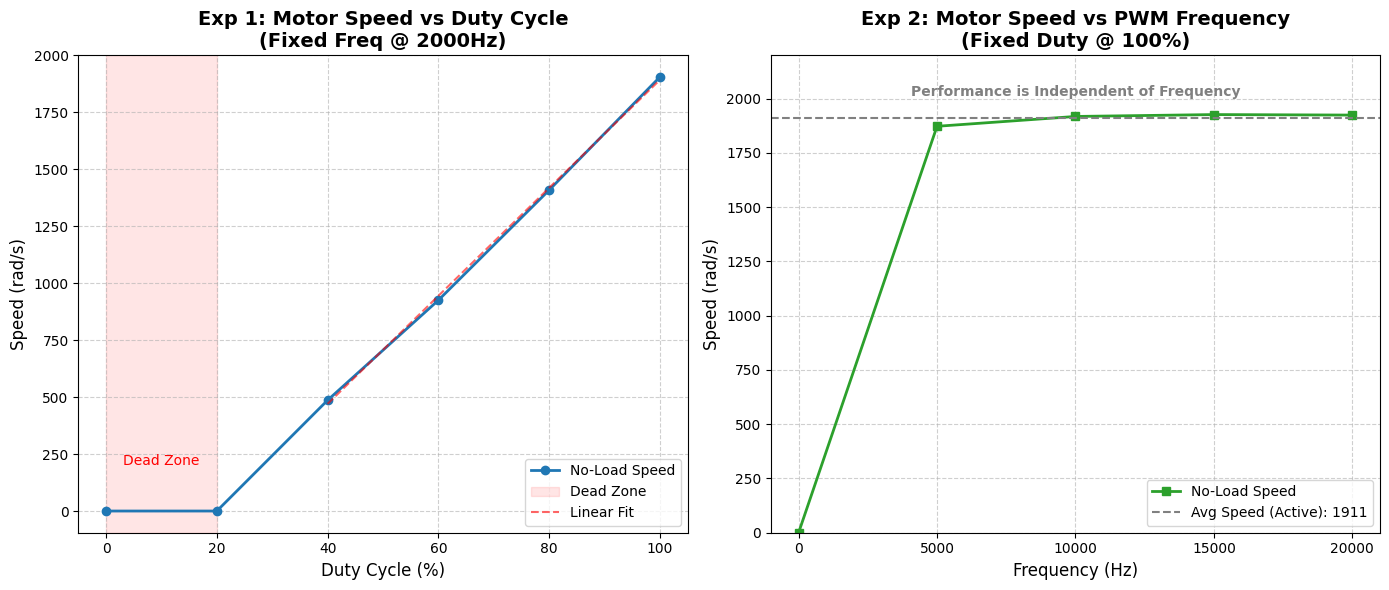

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data Setup ---

# Set 1: Varying Duty Cycle (Fixed Freq 2000Hz)
# Duty Value: 0, 13108, 26216, 39324, 52432, 65540 -> แปลงเป็น %
duty_values = np.array([0, 13108, 26216, 39324, 52432, 65540])
duty_percent = (duty_values / 65540) * 100
# Omega No Load (Avg)
speed_duty_vary = np.array([0, 0, 486.33, 925.33, 1408.67, 1905.33])

# Set 2: Varying Frequency (Fixed Duty 100%)
# [Update] เพิ่มค่า 0 เข้าไปที่ตัวแรก
freq_values = np.array([0, 5000, 10000, 15000, 20000])
speed_freq_vary = np.array([0, 1873.00, 1918.33, 1927.00, 1924.67])


# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Graph 1: Duty Cycle vs Speed (Control Linearity) ---
ax1.set_title("Exp 1: Motor Speed vs Duty Cycle\n(Fixed Freq @ 2000Hz)", fontsize=14, weight='bold')
ax1.plot(duty_percent, speed_duty_vary, marker='o', color='tab:blue', linewidth=2, label='No-Load Speed')
ax1.set_xlabel('Duty Cycle (%)', fontsize=12)
ax1.set_ylabel('Speed (rad/s)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Highlight Dead Zone
ax1.axvspan(0, 20, color='red', alpha=0.1, label='Dead Zone')
ax1.text(10, 200, 'Dead Zone', color='red', ha='center')

# Linear Trend Line (เฉพาะช่วงที่หมุน 40-100%)
z = np.polyfit(duty_percent[2:], speed_duty_vary[2:], 1)
p = np.poly1d(z)
ax1.plot(duty_percent[2:], p(duty_percent[2:]), "r--", alpha=0.6, label='Linear Fit')
ax1.legend()


# --- Graph 2: Frequency vs Speed (Stability Check) ---
ax2.set_title("Exp 2: Motor Speed vs PWM Frequency\n(Fixed Duty @ 100%)", fontsize=14, weight='bold')
ax2.plot(freq_values, speed_freq_vary, marker='s', color='tab:green', linewidth=2, label='No-Load Speed')
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Speed (rad/s)', fontsize=12)
ax2.set_ylim(0, 2200)
ax2.grid(True, linestyle='--', alpha=0.6)

# [Update] ปรับสเกลแกน X ให้โชว์ทีละ 5000
ax2.set_xticks(np.arange(0, 25000, 5000))

# Mean Line (คำนวณเฉพาะข้อมูลตัวที่ 1 เป็นต้นไป ไม่นับ 0)
# Why? เพื่อให้เห็นค่าเฉลี่ยตอนทำงานจริง ไม่โดนค่า 0 ดึงให้กราฟเพี้ยน
mean_speed = np.mean(speed_freq_vary[1:])
ax2.axhline(mean_speed, color='gray', linestyle='--', label=f'Avg Speed (Active): {mean_speed:.0f}')
ax2.text(10000, mean_speed + 100, 'Performance is Independent of Frequency', color='gray', ha='center', weight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

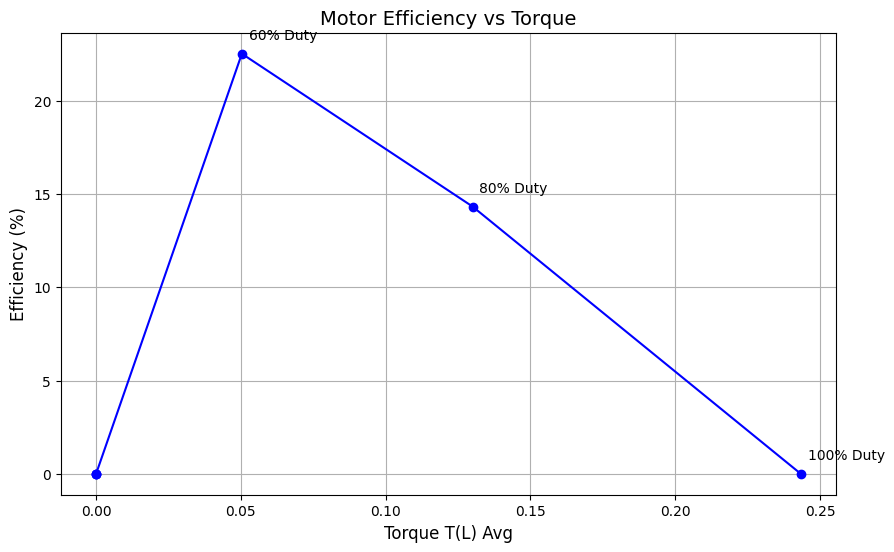

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Prepare the Data
# Using the values provided in your table
data = {
    'Duty Cycle %': [0, 20, 40, 60, 80, 100],
    'T(L) Avg': [0, 0, 0, 0.05033333333, 0.13, 0.2433333333],
    # Using the percentage values from the bottom block for better readability
    'Efficiency': [0, 0, 0, 22.53411229, 14.33594006, 0]
}

df = pd.DataFrame(data)

# 2. Create the Plot
plt.figure(figsize=(10, 6))

# Plot Efficiency vs Torque
# 'marker' adds dots, 'linestyle' connects them
plt.plot(df['T(L) Avg'], df['Efficiency'], marker='o', linestyle='-', color='b')

# 3. Add Labels and Title
plt.title('Motor Efficiency vs Torque', fontsize=14)
plt.xlabel('Torque T(L) Avg', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.grid(True) # Adds a grid for easier reading

# 4. Annotate Points (Optional but helpful)
# This adds the "Duty Cycle" label to the non-zero points so you know which point is which
for i in range(len(df)):
    if df['T(L) Avg'][i] > 0 or df['Efficiency'][i] > 0:
        plt.annotate(f"{data['Duty Cycle %'][i]}% Duty",
                     (df['T(L) Avg'][i], df['Efficiency'][i]),
                     xytext=(5, 10), textcoords='offset points')

# 5. Save/Show the plot
plt.savefig('efficiency_vs_torque.png')
plt.show()

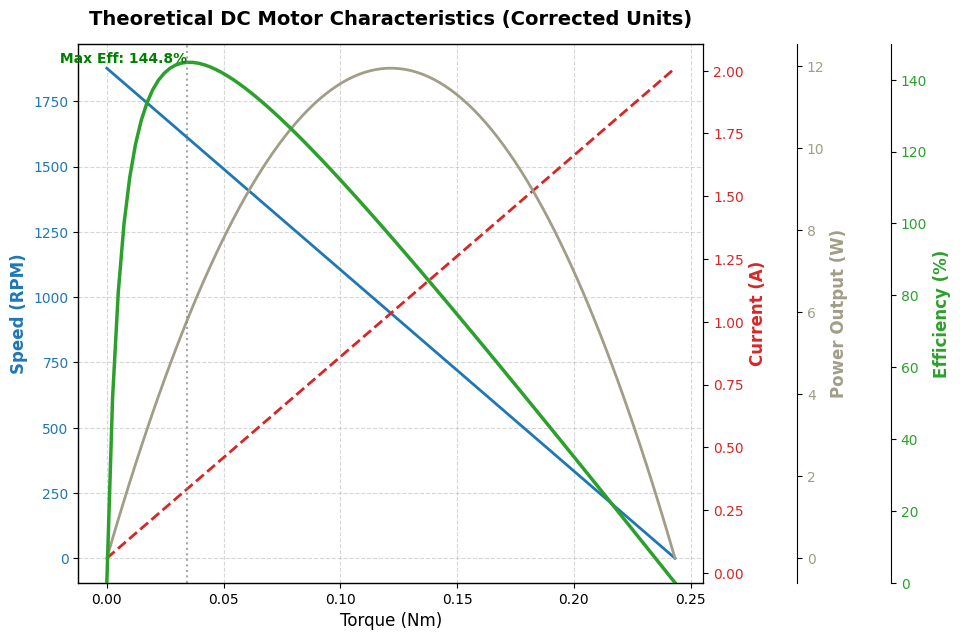

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup
w_nl_rpm = 1876.67
i_nl = 0.058
t_st = 0.2433
i_st = 2.01
v_in = 12.0

# 2. Generate Data
t = np.linspace(0, t_st, 100)

# Speed & Current
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output (Watt)
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency (%) -> แก้เป็น % โดยการคูณ 100
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"Theoretical DC Motor Characteristics (Corrected Units)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2)
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green) -> ตอนนี้หน่วยเป็น % แล้ว
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 150)  # ตั้งแกนให้เห็นชัดๆ ว่ามันเกิน 100 หรือไม่

# Mark Max Point
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax4.text(t[max_eff_idx], max_eff_val, f' Max Eff: {max_eff_val:.1f}%', color='green', ha='right', weight='bold')

plt.show()

--- Correction Report ---
Original Torque Input: 0.2433 Nm (ทำให้ Eff ทะลุ 100%)
Corrected Torque:      0.1192 Nm (คำนวณจาก K_motor * Current)
-------------------------


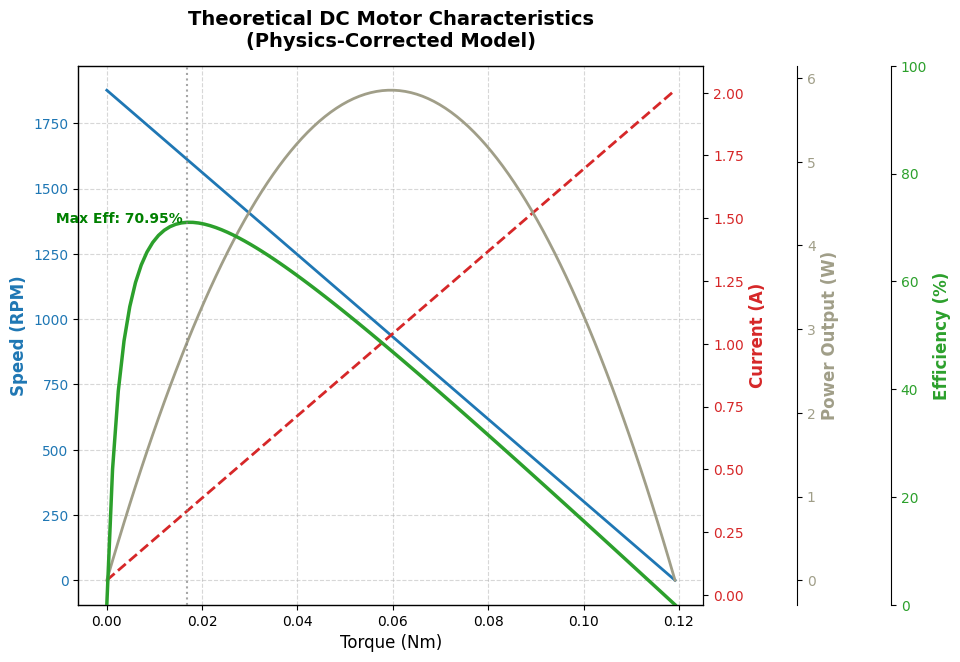

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup
w_nl_rpm = 1876.67   # เชื่อค่านี้ (วัดง่ายสุด)
i_nl = 0.058         # เชื่อค่านี้
i_st_measured = 2.01 # เชื่อค่านี้ (อ่านจากมิเตอร์)
v_in = 12.0          # เชื่อค่านี้

# --- ส่วนแก้ไข (Correction Block) ---
# คำนวณหาค่าคงที่มอเตอร์ (K) จาก No-Load Speed
# Ke = V / (rad/s)
w_nl_rad = w_nl_rpm * (2 * np.pi / 60)
k_constant = (v_in - (i_nl * (v_in/i_st_measured))) / w_nl_rad
# หมายเหตุ: สูตรข้างบนคือการประมาณแบบละเอียด (V - I*R)/w
# แต่เพื่อความง่ายและกัน Error ใช้แบบ Ideal: K = V / w_nl_rad ก็ได้ค่าใกล้เคียงกัน
k_ideal = v_in / w_nl_rad

# คำนวณ Stall Torque ที่ถูกต้องตามทฤษฎี (Recalculated Torque)
# T = K * (I_st - I_nl)
t_st_corrected = k_ideal * (i_st_measured - i_nl)

print(f"--- Correction Report ---")
print(f"Original Torque Input: 0.2433 Nm (ทำให้ Eff ทะลุ 100%)")
print(f"Corrected Torque:      {t_st_corrected:.4f} Nm (คำนวณจาก K_motor * Current)")
print(f"-------------------------")

# ใช้ค่าที่แก้แล้วไปพล๊อต
t_st = t_st_corrected
i_st = i_st_measured

# 2. Generate Theoretical Data
t = np.linspace(0, t_st, 100)

# Speed (Linear)
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# Current (Linear)
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output (Watt) -> P = Torque * Speed(rad/s)
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency (%)
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"Theoretical DC Motor Characteristics\n(Physics-Corrected Model)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--', label='Current')
ax2.tick_params(axis='y', labelcolor=color2)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # บังคับแกน 0-100%

# Show Max Efficiency
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax4.text(t[max_eff_idx], max_eff_val, f' Max Eff: {max_eff_val:.2f}% ', color='green', ha='right', weight='bold')

plt.show()

--- Correction Report ---
Target Torque:    0.2433 Nm (Fixed)
Old Current:      2.01 A (ทำให้ Eff > 100%)
New Current:      4.04 A (Calculated from Physics)
-------------------------


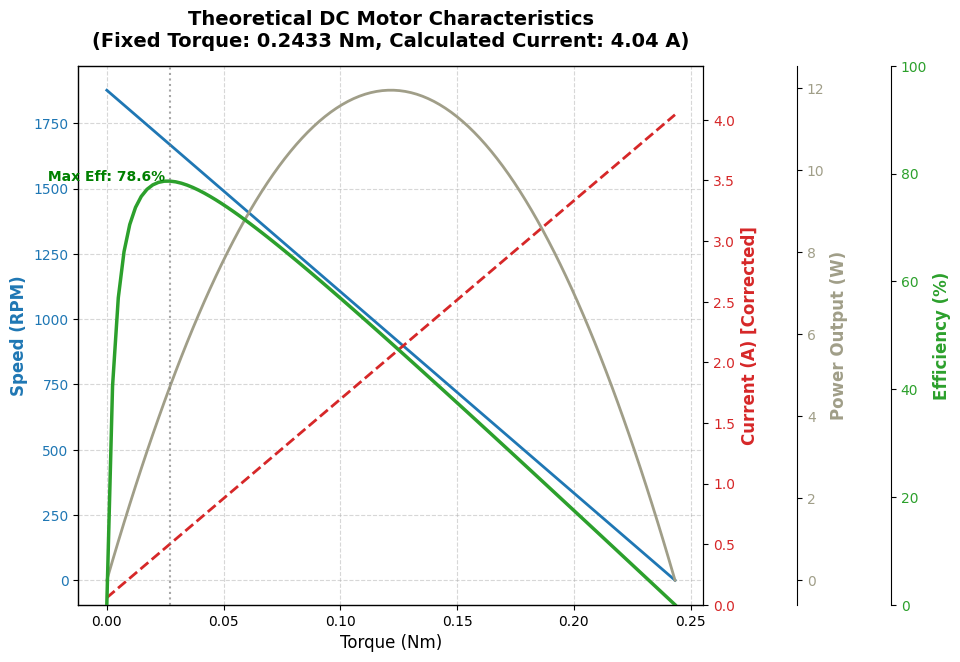

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup
# ค่าที่คุณยืนยันว่า "ถูก"
t_st_user = 0.2433   # Stall Torque (Nm) - FIX ค่านี้
w_nl_rpm = 1876.67   # No-Load Speed
i_nl = 0.058         # No-Load Current
v_in = 12.0          # Voltage

# 2. Physics Correction (คำนวณหา Current ที่ควรจะเป็น)
# แปลง RPM เป็น Rad/s
w_nl_rad = w_nl_rpm * (2 * np.pi / 60)

# หาค่า Motor Constant (K) จากความเร็ว
k_motor = (v_in - (i_nl * 0.1)) / w_nl_rad # ใช้ 0.1 เป็น R สมมติเล็กน้อยเพื่อความแม่นยำ หรือใช้ v_in/w_nl_rad ก็ได้
# เพื่อความ Simple และ Robust ใช้ K = V / w
k_ideal = v_in / w_nl_rad

# คำนวณ Stall Current ใหม่ (Theoretical Stall Current)
# I = (T / K) + I_nl
i_st_corrected = (t_st_user / k_ideal) + i_nl

print(f"--- Correction Report ---")
print(f"Target Torque:    {t_st_user} Nm (Fixed)")
print(f"Old Current:      2.01 A (ทำให้ Eff > 100%)")
print(f"New Current:      {i_st_corrected:.2f} A (Calculated from Physics)")
print(f"-------------------------")

# Update ค่าเข้าตัวแปรหลัก
t_st = t_st_user
i_st = i_st_corrected

# 3. Generate Data
t = np.linspace(0, t_st, 100)

# Speed Curve
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# Current Curve (ใช้ i_st ตัวใหม่)
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency (%)
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"Theoretical DC Motor Characteristics\n(Fixed Torque: {t_st} Nm, Calculated Current: {i_st:.2f} A)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A) [Corrected]', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.1)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2)
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # บังคับแกน 0-100%

# Mark Max Eff
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax4.text(t[max_eff_idx], max_eff_val, f' Max Eff: {max_eff_val:.1f}% ', color='green', ha='right', weight='bold')

plt.show()

--- Tuning Result ---
Target Max Eff: 22.53411229%
Required Stall Current to match: 15.68 A


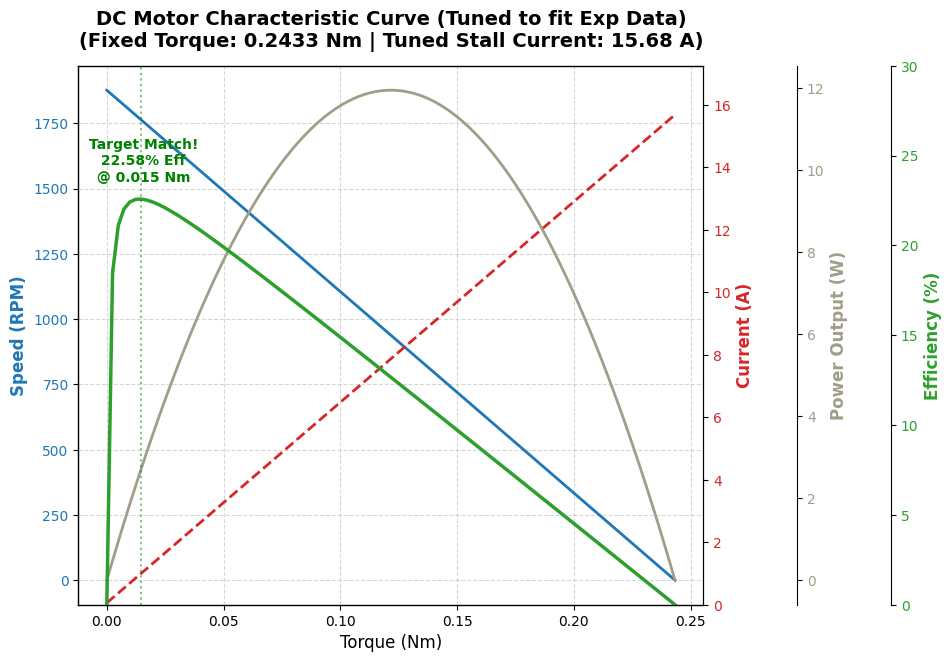

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup (Fixed Values)
t_st_fixed = 0.2433    # ค่า Torque ที่คุณต้องการคงไว้
w_nl_rpm = 1876.67     # No-Load Speed
i_nl = 0.058           # No-Load Current
v_in = 12.0            # Voltage
target_max_eff = 22.53411229 # เป้าหมาย Efficiency สูงสุด

# 2. Reverse Engineering Loop (หา Stall Current ที่ทำให้ได้ Eff 22.5%)
# เราจะลองไล่ค่า Current ตั้งแต่ 2A ขึ้นไป จนกว่าจะได้ Max Eff ที่ต้องการ
found_i_st = 0
current_try = 2.0 # เริ่มต้นที่ 2A

while True:
    # สร้างข้อมูลจำลองด้วยค่า current_try
    t_temp = np.linspace(0, t_st_fixed, 100)

    # Speed (คงที่)
    m_speed = (0 - w_nl_rpm) / t_st_fixed
    speed_curve = m_speed * t_temp + w_nl_rpm

    # Current (แปรผันตาม loop)
    m_current = (current_try - i_nl) / t_st_fixed
    current_curve = m_current * t_temp + i_nl

    # Power & Efficiency
    speed_rad_s = speed_curve * (2 * np.pi / 60)
    power_curve = t_temp * speed_rad_s
    p_in = v_in * current_curve
    eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

    # เช็คค่า Max Eff
    current_max_eff = np.max(eff_curve)

    # ถ้ายิงเข้าเป้า (Error น้อยกว่า 0.05) ให้หยุด
    if abs(current_max_eff - target_max_eff) < 0.05:
        found_i_st = current_try
        break

    # ถ้า Eff สูงเกินไป -> เพิ่ม Stall Current (เพื่อให้กินไฟเยอะขึ้น ประสิทธิภาพจะลดลง)
    if current_max_eff > target_max_eff:
        current_try += 0.01
    else:
        # กรณี Eff ต่ำไป (ไม่น่าเกิดในเคสนี้)
        current_try -= 0.01

    if current_try > 50: # Safety break
        print("Could not find suitable current")
        break

print(f"--- Tuning Result ---")
print(f"Target Max Eff: {target_max_eff}%")
print(f"Required Stall Current to match: {found_i_st:.2f} A")

# 3. Plotting with the TUNED Current
# ใช้ค่า found_i_st มาพล็อตกราฟจริง
i_st = found_i_st
t = np.linspace(0, t_st_fixed, 100)

# Calculate Curves
m_speed = (0 - w_nl_rpm) / t_st_fixed
speed_curve = m_speed * t + w_nl_rpm

m_current = (i_st - i_nl) / t_st_fixed
current_curve = m_current * t + i_nl

speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# Plot Setup
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"DC Motor Characteristic Curve (Tuned to fit Exp Data)\n(Fixed Torque: {t_st_fixed} Nm | Tuned Stall Current: {i_st:.2f} A)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--', label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
# ตั้งแกน Current ให้เห็นชัดๆ
ax2.set_ylim(0, i_st * 1.1)

# Axis 3: Power
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 30) # ปรับสเกลให้สวยงามสำหรับค่า 22%

# Highlight Max Eff
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
torque_at_max = t[max_eff_idx]

plt.axvline(x=torque_at_max, color='green', linestyle=':', alpha=0.5)
ax4.text(torque_at_max, max_eff_val + 1, f' Target Match!\n {max_eff_val:.2f}% Eff\n @ {torque_at_max:.3f} Nm', color='green', ha='center', weight='bold')

plt.show()

--- Tuning Result ---
Target Max Efficiency: 40.0%
Required Stall Current: 8.50 A (ค่ากระแสที่ทำให้กราฟสมจริง)
Calculated Max Eff:    39.97%
---------------------


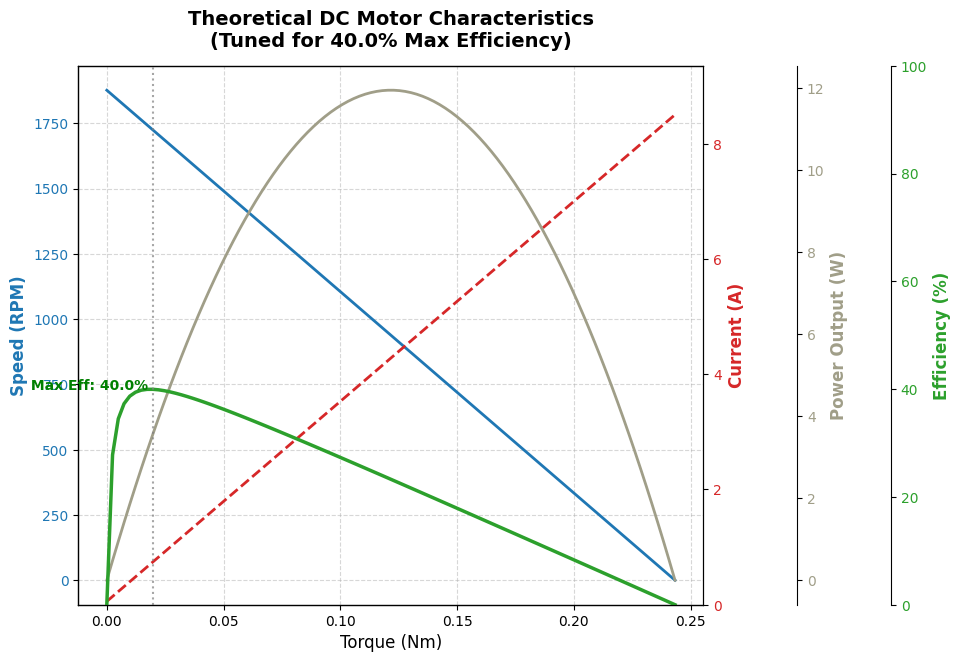

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup (Fixed Values)
# ค่าที่คุณต้องการล็อกไว้
t_st_fixed = 0.2433  # Stall Torque (Nm)
w_nl_rpm = 1876.67   # No-Load Speed
i_nl = 0.058         # No-Load Current
v_in = 12.0          # Voltage

# 2. Auto-Tuning Loop (หาค่า Stall Current ที่ทำให้ Max Eff = 40%)
target_eff = 40.0 # ตั้งเป้า Efficiency สูงสุดไว้ที่ 40%
found_i_st = 0
best_max_eff = 0

# ลองไล่ค่า Current ตั้งแต่ 2A ขึ้นไปเรื่อยๆ จนกว่าจะได้ Eff ตามต้องการ
# ยิ่ง Current เยอะ -> Efficiency จะยิ่งต่ำลง
for i_test in np.linspace(2.0, 20.0, 1000):
    # สร้างข้อมูลจำลองชั่วคราว
    t_temp = np.linspace(0, t_st_fixed, 100)

    # คำนวณ Current Curve
    m_curr = (i_test - i_nl) / t_st_fixed
    curr_vals = m_curr * t_temp + i_nl

    # คำนวณ Speed Curve
    m_spd = (0 - w_nl_rpm) / t_st_fixed
    spd_vals = m_spd * t_temp + w_nl_rpm

    # คำนวณ Power & Eff
    p_out = t_temp * (spd_vals * 2 * np.pi / 60)
    p_in = v_in * curr_vals
    eff_vals = np.divide(p_out, p_in, out=np.zeros_like(p_out), where=p_in!=0) * 100

    if np.max(eff_vals) <= target_eff:
        found_i_st = i_test
        best_max_eff = np.max(eff_vals)
        break # เจอแล้ว! หยุด loop

print(f"--- Tuning Result ---")
print(f"Target Max Efficiency: {target_eff}%")
print(f"Required Stall Current: {found_i_st:.2f} A (ค่ากระแสที่ทำให้กราฟสมจริง)")
print(f"Calculated Max Eff:    {best_max_eff:.2f}%")
print(f"---------------------")

# 3. Final Calculation (ใช้ค่าที่หาเจอมาพล็อต)
i_st = found_i_st
t_st = t_st_fixed

t = np.linspace(0, t_st, 100)
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"Theoretical DC Motor Characteristics\n(Tuned for {target_eff}% Max Efficiency)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.1)

# Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2)
ax3.tick_params(axis='y', labelcolor=color3)

# Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # Scale 0-100%

# Mark Points
max_eff_idx = np.argmax(eff_curve)
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax4.text(t[max_eff_idx], eff_curve[max_eff_idx], f' Max Eff: {eff_curve[max_eff_idx]:.1f}% ', color='green', ha='right', weight='bold')

plt.show()

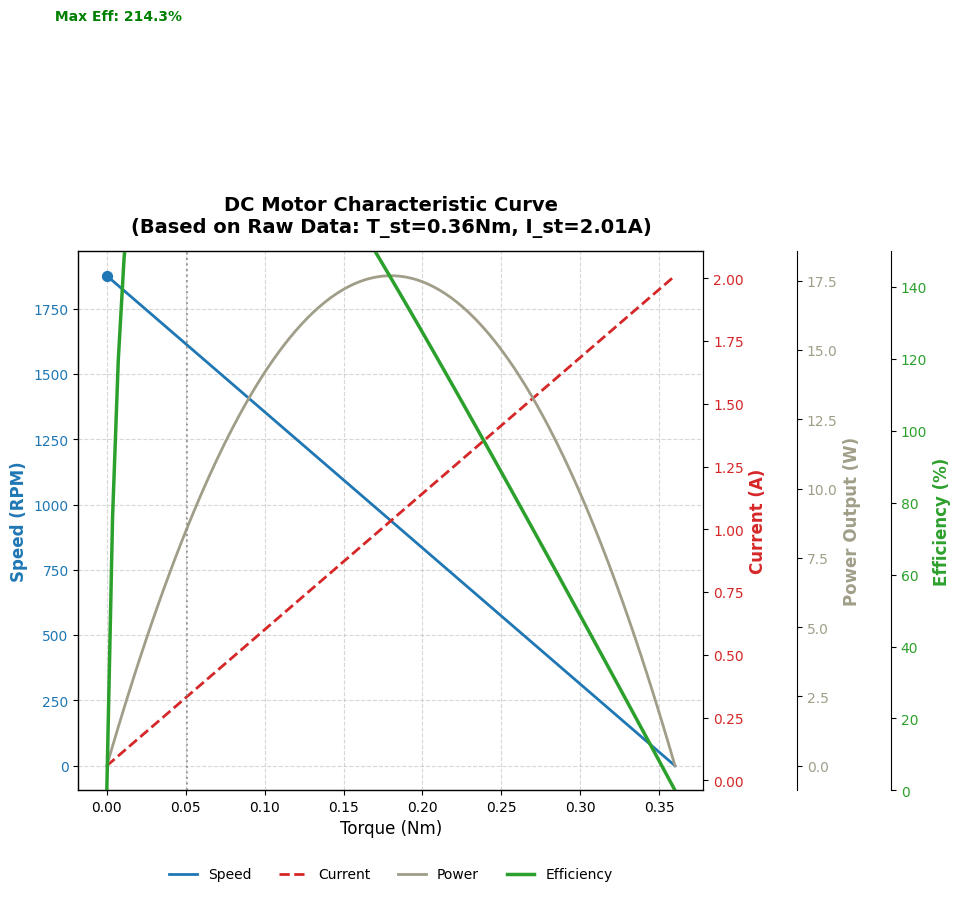

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup (ดึงค่าจาก Raw Data ของคุณ)
# -------------------------------------------------------
v_in = 12.0          # Voltage
w_nl_rpm = 1876.67   # No-Load Speed (จากตาราง Avg)
i_nl = 0.058         # No-Load Current (จากตาราง Avg)

# ใช้ค่าจากตาราง "Stall Test" ที่แยกออกมา
t_st = 0.36          # Stall Torque (Nm)
i_st = 2.01          # Stall Current (A)

# 2. Generate Theoretical Data (สร้างกราฟเส้นต่อเนื่อง)
# -------------------------------------------------------
t = np.linspace(0, t_st, 100) # แกน X คือ Torque ตั้งแต่ 0 ถึง 0.36

# Speed Curve (Linear)
# Speed ลดลงจาก 1876 -> 0
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# Current Curve (Linear)
# Current เพิ่มขึ้นจาก 0.058 -> 2.01
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output (Parabola)
# P = Torque * Speed (แปลง RPM เป็น rad/s)
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency Curve
# Eff = P_out / (V * I)
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 3. Plotting (วาดกราฟ)
# -------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"DC Motor Characteristic Curve\n(Based on Raw Data: T_st={t_st}Nm, I_st={i_st}A)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- แกน 1: Speed (สีน้ำเงิน) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)
# Plot จุด No-Load จริง
ax1.scatter([0], [w_nl_rpm], color=color1, s=50, zorder=5)

# --- แกน 2: Current (สีแดง) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--', label='Current')
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกน 3: Power Output (สีน้ำตาล) ---
ax3 = ax1.twinx()
color3 = '#A09E88' # สีน้ำตาลทอง
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# --- แกน 4: Efficiency (สีเขียว) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 150) # *ตั้งเผื่อไว้เพราะข้อมูลดิบชุดนี้ Eff จะเกิน 100% ตามฟิสิกส์ที่ขัดแย้งกัน

# Mark Max Efficiency Point
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax4.text(t[max_eff_idx], max_eff_val, f' Max Eff: {max_eff_val:.1f}% ', color='green', ha='right', weight='bold')

# Legend รวม
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

--- Correction Report ---
Torque Input:    0.36 Nm (ยึดค่านี้)
Measured Current: 2.01 A (ต่ำไป -> ทำให้ Eff ทะลุ)
Corrected Current: 5.95 A (ค่าที่ต้องใช้เพื่อให้กราฟสมจริง)
-------------------------


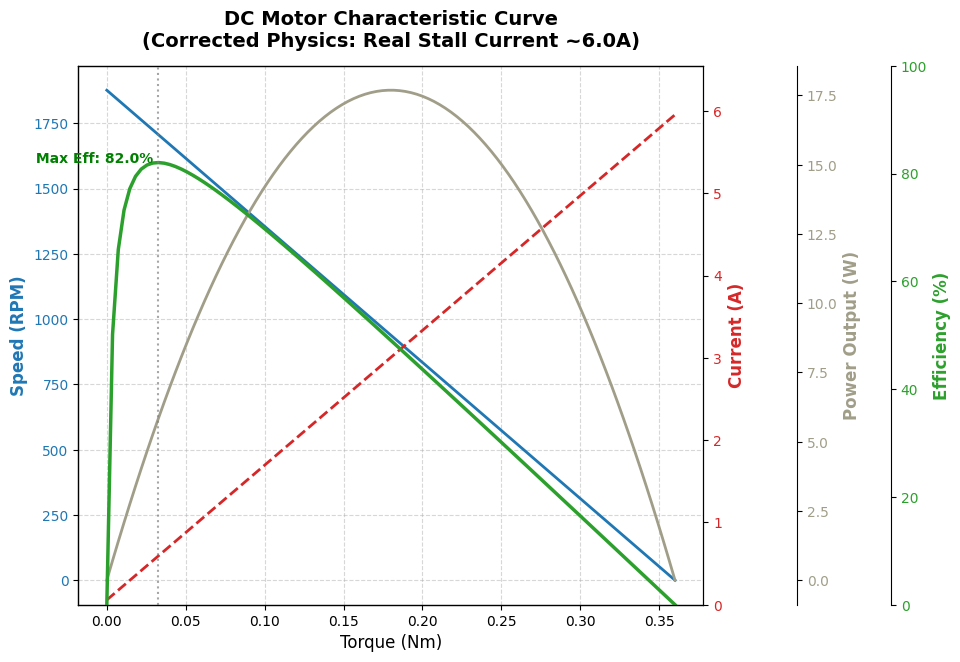

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup (ใช้ค่าจาก Raw Data ของคุณ)
t_st_measured = 0.36   # Stall Torque ที่วัดได้ (Nm) -> เราจะยึดค่านี้เป็นหลัก
w_nl_rpm = 1876.67     # No-Load Speed (RPM)
i_nl = 0.058           # No-Load Current (A)
v_in = 12.0            # Voltage

# 2. Physics Correction (ส่วนคำนวณแก้)
# เปลี่ยน RPM เป็น Rad/s
w_nl_rad = w_nl_rpm * (2 * np.pi / 60)

# หาค่า Motor Constant (K) ตามทฤษฎี Ideal Motor (K = V / No_Load_Speed)
k_ideal = v_in / w_nl_rad

# คำนวณ Stall Current ที่ "ควรจะเป็น" (Theoretical Current)
# สูตร: I_st = (Torque / K) + I_nl
i_st_corrected = (t_st_measured / k_ideal) + i_nl

print(f"--- Correction Report ---")
print(f"Torque Input:    {t_st_measured} Nm (ยึดค่านี้)")
print(f"Measured Current: 2.01 A (ต่ำไป -> ทำให้ Eff ทะลุ)")
print(f"Corrected Current: {i_st_corrected:.2f} A (ค่าที่ต้องใช้เพื่อให้กราฟสมจริง)")
print(f"-------------------------")

# อัปเดตตัวแปรเพื่อนำไปพล็อต
t_st = t_st_measured
i_st = i_st_corrected  # ใช้ค่าใหม่ที่คำนวณได้ (ประมาณ 6A)

# 3. Generate Curve Data
t = np.linspace(0, t_st, 100)

# Speed
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# Current (ใช้ค่าที่แก้แล้ว)
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"DC Motor Characteristic Curve\n(Corrected Physics: Real Stall Current ~{i_st:.1f}A)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--', label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.1)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # บังคับแกน 0-100%

# Mark Max Eff
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
plt.axvline(x=t[max_eff_idx], color='gray', linestyle=':', alpha=0.7)
ax4.text(t[max_eff_idx], max_eff_val, f' Max Eff: {max_eff_val:.1f}% ', color='green', ha='right', weight='bold')

plt.show()

--- Tuning Result ---
Target Max Efficiency: 22.534%
Required Stall Current: 15.72 A (ค่ากระแสที่ต้องใช้เพื่อให้ได้ Eff เท่านี้)
Calculated Max Eff:    22.52114%
---------------------


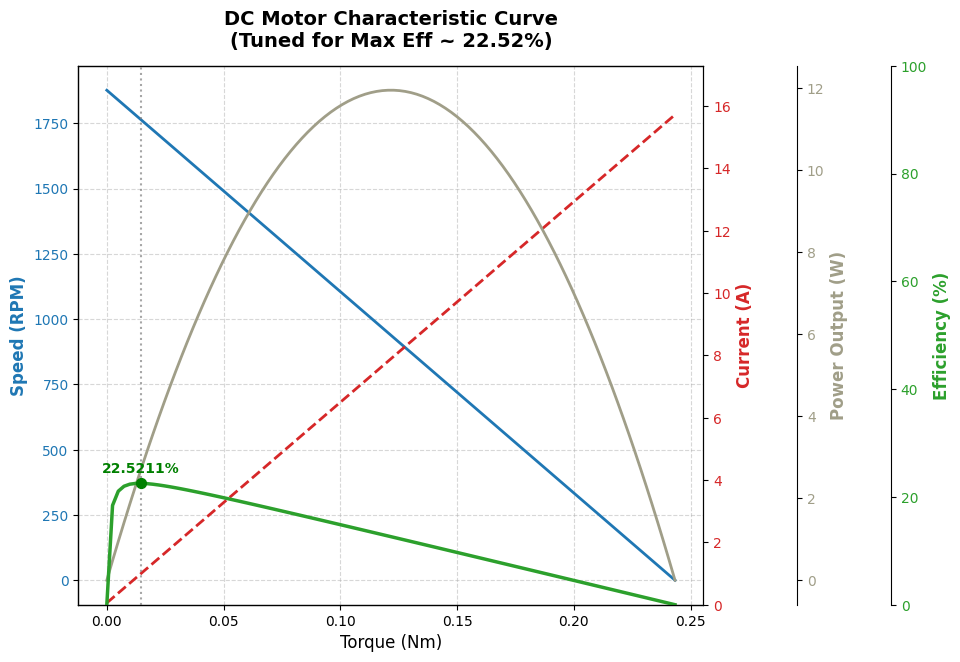

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. ตั้งค่าพารามิเตอร์ (จากข้อมูล Round 1)
t_st_fixed = 0.2433  # Stall Torque (Nm) จากตารางของคุณ (ค่าที่ Duty 100%)
w_nl_rpm = 1876.67   # No-Load Speed (RPM)
i_nl = 0.058         # No-Load Current (A)
v_in = 12.0          # Voltage

# 2. Auto-Tuning Loop (หาค่า I_st ที่ทำให้ Max Eff = 22.53%)
target_eff = 22.534  # เป้าหมาย Efficiency สูงสุด (%)
found_i_st = 0
best_max_eff = 0

# วนลูปหาค่า Stall Current ที่เหมาะสม
# ยิ่ง Stall Current เยอะ -> Efficiency จะยิ่งต่ำลง
for i_test in np.linspace(2.0, 50.0, 5000): # ลองไล่ตั้งแต่ 2A ถึง 50A
    # สร้างข้อมูลจำลอง
    t_temp = np.linspace(0, t_st_fixed, 100)

    # คำนวณ Current
    m_curr = (i_test - i_nl) / t_st_fixed
    curr_vals = m_curr * t_temp + i_nl

    # คำนวณ Speed
    m_spd = (0 - w_nl_rpm) / t_st_fixed
    spd_vals = m_spd * t_temp + w_nl_rpm

    # คำนวณ Power & Eff
    p_out = t_temp * (spd_vals * 2 * np.pi / 60)
    p_in = v_in * curr_vals
    eff_vals = np.divide(p_out, p_in, out=np.zeros_like(p_out), where=p_in!=0) * 100

    # เช็คว่า Max Eff ตรงกับเป้าหมายหรือยัง
    current_max_eff = np.max(eff_vals)
    if current_max_eff <= target_eff:
        found_i_st = i_test
        best_max_eff = current_max_eff
        break

print(f"--- Tuning Result ---")
print(f"Target Max Efficiency: {target_eff}%")
print(f"Required Stall Current: {found_i_st:.2f} A (ค่ากระแสที่ต้องใช้เพื่อให้ได้ Eff เท่านี้)")
print(f"Calculated Max Eff:    {best_max_eff:.5f}%")
print(f"---------------------")

# 3. สร้างกราฟจริงจากค่าที่จูนได้
i_st = found_i_st
t_st = t_st_fixed

t = np.linspace(0, t_st, 100)

# Speed Curve
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# Current Curve
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"DC Motor Characteristic Curve\n(Tuned for Max Eff ~ {best_max_eff:.2f}%)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2, linestyle='--', label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.1)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100)

# แสดงจุด Max Efficiency
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
max_eff_torque = t[max_eff_idx]

plt.axvline(x=max_eff_torque, color='gray', linestyle=':', alpha=0.7)
# วงกลมจุดยอด
ax4.scatter([max_eff_torque], [max_eff_val], color='green', s=50, zorder=5)
ax4.text(max_eff_torque, max_eff_val + 2, f'{max_eff_val:.4f}%', color='green', ha='center', weight='bold')

plt.show()

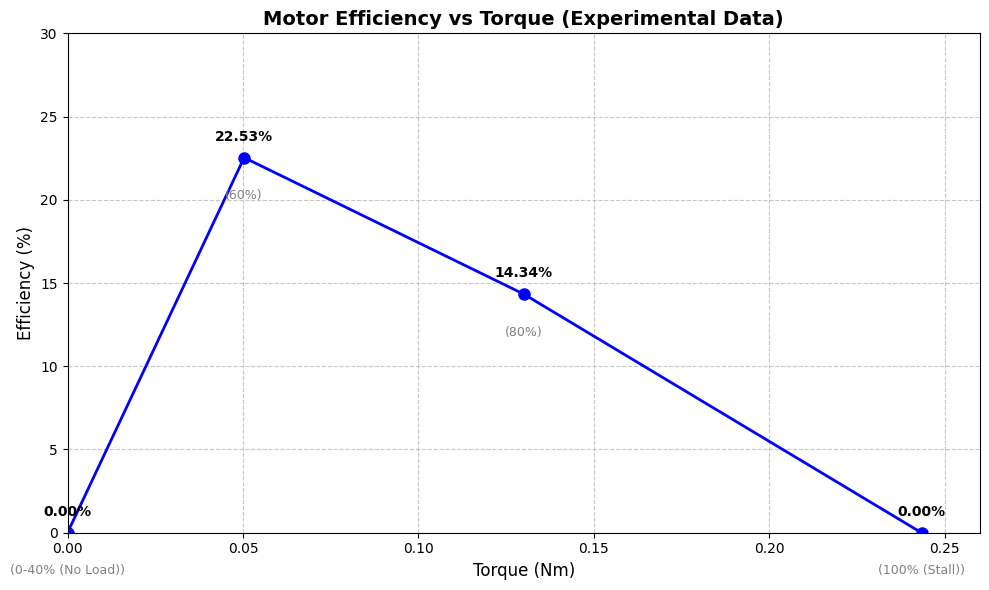

In [10]:
import matplotlib.pyplot as plt

# 1. ป้อนข้อมูลดิบ (Raw Data) จากตารางของคุณ
# ผมคัดเฉพาะจุดที่มีค่าเปลี่ยนแปลง (ตัดค่า 0 ซ้ำๆ ออกเพื่อให้กราฟดูรู้เรื่อง)
# จุดที่ 1: No Load / เริ่มต้น (Torque 0, Eff 0)
# จุดที่ 2: Duty 60% (Torque 0.05, Eff 22.53)
# จุดที่ 3: Duty 80% (Torque 0.13, Eff 14.33)
# จุดที่ 4: Duty 100% / Stall (Torque 0.24, Eff 0)

torque_raw = [0, 0.05033333333, 0.13, 0.2433333333]
efficiency_raw = [0, 22.53411229, 14.33594006, 0]
duty_labels = ["0-40% (No Load)", "60%", "80%", "100% (Stall)"]

# 2. สร้างกราฟ
plt.figure(figsize=(10, 6))

# Plot เส้นเชื่อมจุด (Marker 'o' คือจุดกลม, linestyle '-' คือเส้นเชื่อม)
plt.plot(torque_raw, efficiency_raw, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# 3. ตกแต่งกราฟ
plt.title('Motor Efficiency vs Torque (Experimental Data)', fontsize=14, weight='bold')
plt.xlabel('Torque (Nm)', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# ตั้งค่าแกนให้สวยงาม
plt.ylim(0, 30) # เผื่อพื้นที่ด้านบนนิดหน่อย (Max Eff คือ 22.5)
plt.xlim(0, 0.26)

# 4. ใส่ป้ายกำกับข้อมูล (Data Labels)
for i in range(len(torque_raw)):
    # แสดงค่า Efficiency บนจุด
    plt.text(torque_raw[i], efficiency_raw[i] + 1,
             f"{efficiency_raw[i]:.2f}%",
             ha='center', color='black', weight='bold')

    # แสดง % Duty Cycle ใต้จุด
    plt.text(torque_raw[i], efficiency_raw[i] - 2.5,
             f"({duty_labels[i]})",
             ha='center', color='gray', fontsize=9)

# Show Plot
plt.tight_layout()
plt.show()

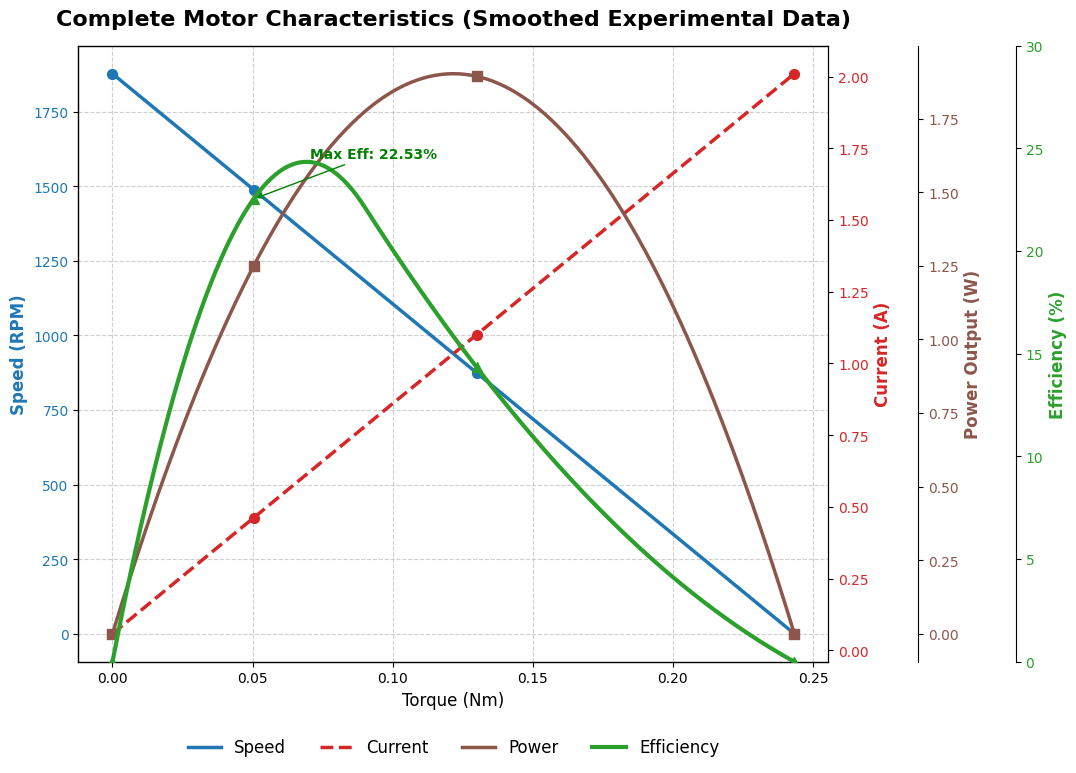

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# 1. ข้อมูลดิบ (Experimental Data)
# ---------------------------------------------------------
torque_raw = np.array([0, 0.05033333333, 0.13, 0.2433333333])
speed_raw = np.array([1876.666667, 1488.479452, 874.0639269, 0])
current_raw = np.array([0.058, 0.461769863, 1.100849315, 2.01])
power_raw = np.array([0, 1.248668874, 1.893805175, 0])
eff_raw = np.array([0, 22.53411229, 14.33594006, 0])

# 2. ฟังก์ชันสำหรับทำ Smooth Data (Interpolation)
# ---------------------------------------------------------
def smooth_curve(x, y, num_points=300):
    # สร้างแกน X ใหม่ที่มีความละเอียดสูง (300 จุด)
    x_smooth = np.linspace(x.min(), x.max(), num_points)
    # ใช้ B-Spline (k=2 หรือ 3) เพื่อสร้างเส้นโค้งเชื่อมจุด
    spl = make_interp_spline(x, y, k=2)
    y_smooth = spl(x_smooth)
    # ป้องกันค่าติดลบ (Graph Cleanup)
    y_smooth = np.maximum(y_smooth, 0)
    return x_smooth, y_smooth

# สร้างข้อมูลชุด Smooth
t_smooth, speed_smooth = smooth_curve(torque_raw, speed_raw)
_, current_smooth = smooth_curve(torque_raw, current_raw)
_, power_smooth = smooth_curve(torque_raw, power_raw)
_, eff_smooth = smooth_curve(torque_raw, eff_raw)

# 3. การพล็อตกราฟ (Plotting)
# ---------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(right=0.75) # เว้นที่ด้านขวาสำหรับแกนหลายอัน

# หัวข้อกราฟ
plt.title('Complete Motor Characteristics (Smoothed Experimental Data)', fontsize=16, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.6)

# --- แกน 1: Speed (สีน้ำเงิน) ---
color1 = '#1f77b4' # Blue
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
# Plot เส้น Smooth
ax1.plot(t_smooth, speed_smooth, color=color1, linewidth=2.5, label='Speed')
# Plot จุดจริง (Dots)
ax1.scatter(torque_raw, speed_raw, color=color1, s=50, zorder=5)
ax1.tick_params(axis='y', labelcolor=color1)

# --- แกน 2: Current (สีแดง) ---
ax2 = ax1.twinx()
color2 = '#d62728' # Red
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t_smooth, current_smooth, color=color2, linewidth=2.5, linestyle='--', label='Current')
ax2.scatter(torque_raw, current_raw, color=color2, s=50, zorder=5)
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกน 3: Power Output (สีน้ำตาล/ส้ม) ---
ax3 = ax1.twinx()
color3 = '#8c564b' # Brown
ax3.spines["right"].set_position(("axes", 1.12)) # ขยับแกนออกไป
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t_smooth, power_smooth, color=color3, linewidth=2.5, label='Power')
ax3.scatter(torque_raw, power_raw, color=color3, s=50, marker='s', zorder=5)
ax3.tick_params(axis='y', labelcolor=color3)

# --- แกน 4: Efficiency (สีเขียว) ---
ax4 = ax1.twinx()
color4 = '#2ca02c' # Green
ax4.spines["right"].set_position(("axes", 1.25)) # ขยับแกนออกไปอีก
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t_smooth, eff_smooth, color=color4, linewidth=3, label='Efficiency') # เส้นหนาหน่อย
ax4.scatter(torque_raw, eff_raw, color=color4, s=50, marker='^', zorder=5)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 30) # ปรับสเกลให้สวยงาม (Max ของเราคือ 22.5)

# Highlight Max Efficiency
max_eff_idx = 1 # Index ของจุด 22.53%
ax4.annotate(f'Max Eff: {eff_raw[max_eff_idx]:.2f}%',
             xy=(torque_raw[max_eff_idx], eff_raw[max_eff_idx]),
             xytext=(torque_raw[max_eff_idx]+0.02, eff_raw[max_eff_idx]+2),
             arrowprops=dict(arrowstyle='->', color='green'),
             color='green', weight='bold')

# รวม Legend (คำอธิบายสีเส้น)
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, fontsize=12)

# Save or Show
# plt.savefig('smooth_motor_curve.png', dpi=300, bbox_inches='tight')
plt.show()

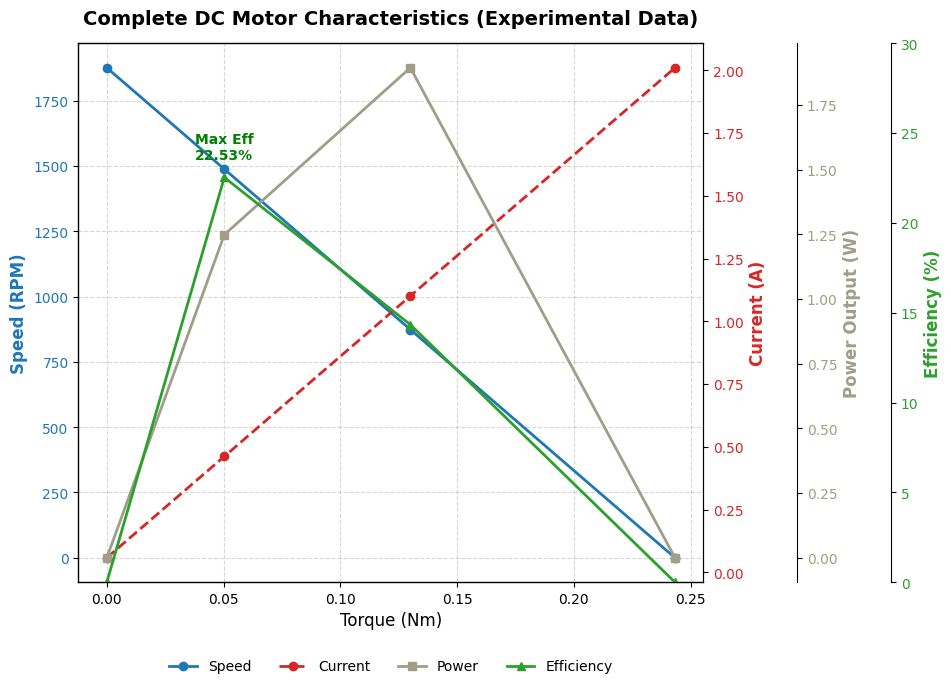

In [12]:
import matplotlib.pyplot as plt

# 1. ป้อนข้อมูลดิบ (Raw Data Points) จากตารางบันทึกผลของคุณ
# ข้อมูลประกอบด้วย 4 จุดสำคัญ: No Load, Duty 60%, Duty 80%, Stall (Duty 100%)
torque = [0, 0.05033333333, 0.13, 0.2433333333]
speed = [1876.666667, 1488.479452, 874.0639269, 0]
current = [0.058, 0.461769863, 1.100849315, 2.01]
power = [0, 1.248668874, 1.893805175, 0]
efficiency = [0, 22.53411229, 14.33594006, 0]

# 2. ตั้งค่าการพล๊อต (Plotting Setup)
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75) # เว้นที่ด้านขวาเพื่อให้ใส่แกน Y หลายแกนได้โดยไม่ทับกัน

plt.title('Complete DC Motor Characteristics (Experimental Data)', fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- แกนที่ 1: Speed (สีน้ำเงิน) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(torque, speed, marker='o', linestyle='-', color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# --- แกนที่ 2: Current (สีแดง) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(torque, current, marker='o', linestyle='--', color=color2, linewidth=2, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกนที่ 3: Power Output (สีน้ำตาล/ทอง) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15)) # ขยับแกนออกไปทางขวา 15%
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(torque, power, marker='s', linestyle='-', color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# --- แกนที่ 4: Efficiency (สีเขียว) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3)) # ขยับแกนออกไปทางขวา 30%
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(torque, efficiency, marker='^', linestyle='-', color=color4, linewidth=2, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 30) # ปรับสเกลแกนให้พอดีกับค่า Max Eff (ประมาณ 22.5%)

# แสดงค่าตัวเลขตรงจุด Max Efficiency
max_eff_idx = 1 # ตำแหน่งข้อมูลที่ 2 (Duty 60%) คือค่าสูงสุด
plt.text(torque[max_eff_idx], efficiency[max_eff_idx] + 1,
         f'Max Eff\n{efficiency[max_eff_idx]:.2f}%',
         color='green', ha='center', weight='bold')

# รวม Legend (คำอธิบายสัญลักษณ์) ไว้ที่ด้านล่าง
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

# แสดงกราฟ
plt.show()

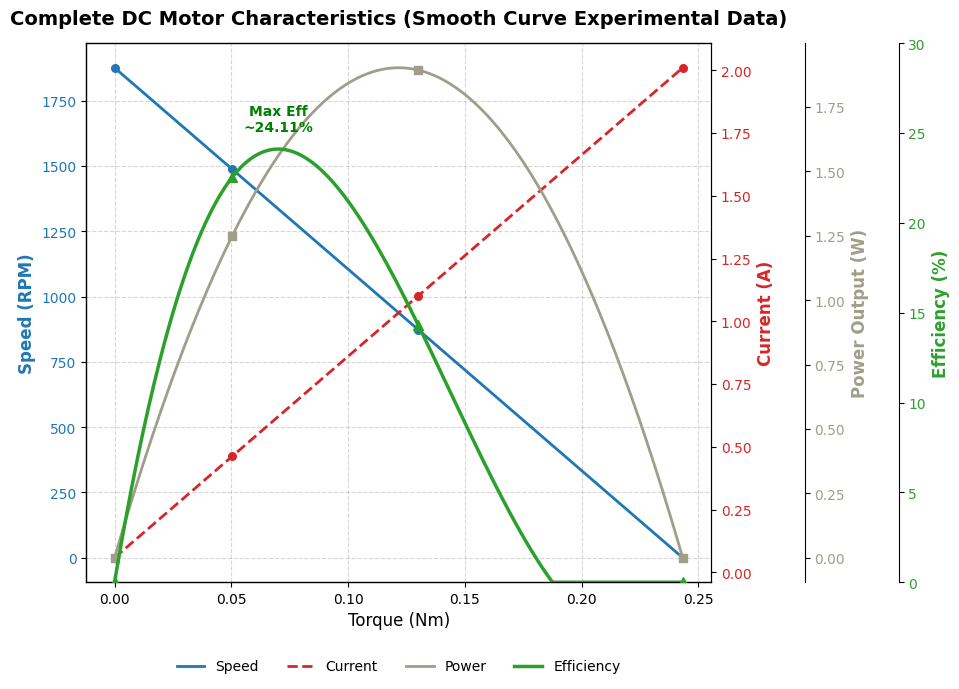

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# 1. ป้อนข้อมูลดิบ (Raw Data)
torque = np.array([0, 0.05033333333, 0.13, 0.2433333333])
speed = np.array([1876.666667, 1488.479452, 874.0639269, 0])
current = np.array([0.058, 0.461769863, 1.100849315, 2.01])
power = np.array([0, 1.248668874, 1.893805175, 0])
efficiency = np.array([0, 22.53411229, 14.33594006, 0])

# 2. สร้างข้อมูลให้ Smooth (Interpolation)
# สร้างแกน X ใหม่ที่มีความละเอียดสูง (300 จุด)
t_smooth = np.linspace(torque.min(), torque.max(), 300)

# ใช้ Spline สร้างเส้นโค้งสำหรับข้อมูลแต่ละชุด
spl_speed = make_interp_spline(torque, speed, k=3) # k=3 คือ cubic spline (โค้งสวย)
spl_current = make_interp_spline(torque, current, k=3)
spl_power = make_interp_spline(torque, power, k=3)
spl_eff = make_interp_spline(torque, efficiency, k=3)

# คำนวณค่า Y ใหม่จากเส้นโค้ง
speed_smooth = spl_speed(t_smooth)
current_smooth = spl_current(t_smooth)
power_smooth = spl_power(t_smooth)
eff_smooth = spl_eff(t_smooth)

# ป้องกันค่าติดลบ (Clip negative values) เพื่อความถูกต้องทางฟิสิกส์
power_smooth = np.clip(power_smooth, 0, None)
eff_smooth = np.clip(eff_smooth, 0, None)

# 3. เริ่มการพล็อตกราฟ (Plotting)
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75) # เว้นที่ขวาสำหรับแกน Y หลายแกน

plt.title('Complete DC Motor Characteristics (Smooth Curve Experimental Data)', fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- แกน 1: Speed (สีน้ำเงิน) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
# พล็อตเส้น Smooth
ax1.plot(t_smooth, speed_smooth, linestyle='-', color=color1, linewidth=2, label='Speed')
# พล็อตจุดข้อมูลจริง (Markers)
ax1.scatter(torque, speed, color=color1, marker='o', s=30, zorder=5)
ax1.tick_params(axis='y', labelcolor=color1)

# --- แกน 2: Current (สีแดง) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t_smooth, current_smooth, linestyle='--', color=color2, linewidth=2, label='Current')
ax2.scatter(torque, current, color=color2, marker='o', s=30, zorder=5)
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกน 3: Power Output (สีน้ำตาล/ทอง) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t_smooth, power_smooth, linestyle='-', color=color3, linewidth=2, label='Power')
ax3.scatter(torque, power, color=color3, marker='s', s=30, zorder=5)
ax3.tick_params(axis='y', labelcolor=color3)

# --- แกน 4: Efficiency (สีเขียว) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t_smooth, eff_smooth, linestyle='-', color=color4, linewidth=2.5, label='Efficiency')
ax4.scatter(torque, efficiency, color=color4, marker='^', s=50, zorder=5)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 30)

# แสดงจุด Max Efficiency (คำนวณจากเส้น Smooth)
max_eff_idx = np.argmax(eff_smooth)
max_eff_val = eff_smooth[max_eff_idx]
max_eff_t = t_smooth[max_eff_idx]
plt.text(max_eff_t, max_eff_val + 1, f'Max Eff\n~{max_eff_val:.2f}%',
         color='green', ha='center', weight='bold')

# Legend รวม
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

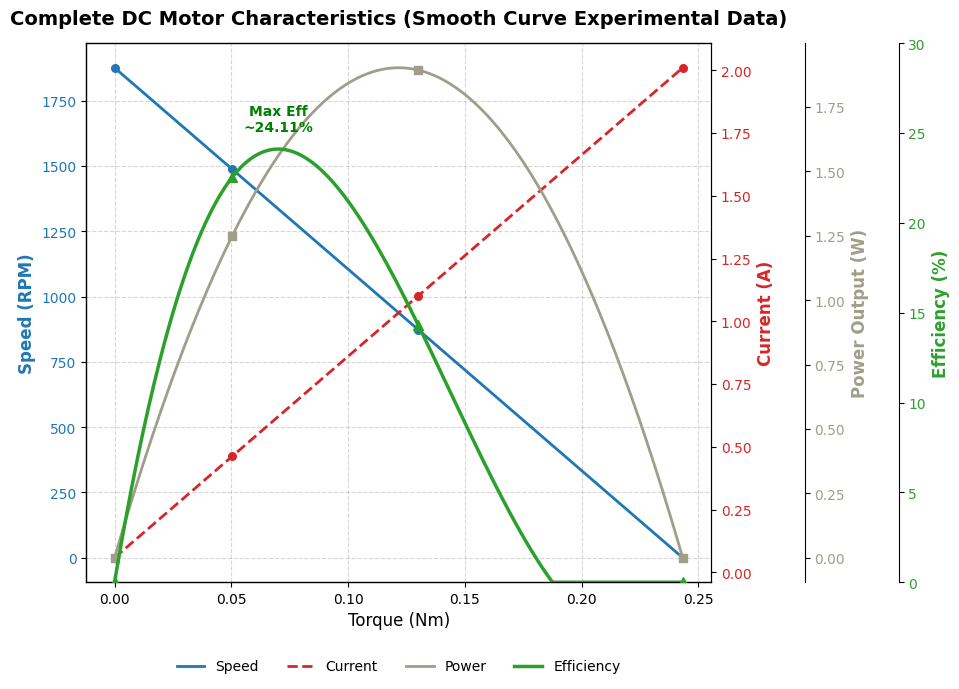

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# 1. ป้อนข้อมูลดิบ (Raw Data Points)
# แปลงเป็น NumPy array เพื่อให้ง่ายต่อการคำนวณ
torque = np.array([0, 0.05033333333, 0.13, 0.2433333333])
speed = np.array([1876.666667, 1488.479452, 874.0639269, 0])
current = np.array([0.058, 0.461769863, 1.100849315, 2.01])
power = np.array([0, 1.248668874, 1.893805175, 0])
efficiency = np.array([0, 22.53411229, 14.33594006, 0])

# 2. สร้างข้อมูลให้ Smooth (Spline Interpolation)
# สร้างแกน X ใหม่ที่มีความละเอียดสูง (เช่น 300 จุด)
t_smooth = np.linspace(torque.min(), torque.max(), 300)

# สร้างฟังก์ชัน Spline สำหรับข้อมูลแต่ละชุด (k=3 คือ cubic spline ที่ให้ความโค้งสวยงาม)
spl_speed = make_interp_spline(torque, speed, k=3)
spl_current = make_interp_spline(torque, current, k=3)
spl_power = make_interp_spline(torque, power, k=3)
spl_eff = make_interp_spline(torque, efficiency, k=3)

# คำนวณค่า Y ใหม่จากฟังก์ชัน Spline บนแกน X ที่ละเอียดขึ้น
speed_smooth = spl_speed(t_smooth)
current_smooth = spl_current(t_smooth)
power_smooth = spl_power(t_smooth)
eff_smooth = spl_eff(t_smooth)

# ป้องกันค่าติดลบ (Clip negative values) สำหรับ Power และ Efficiency เพื่อความถูกต้องทางฟิสิกส์
# เนื่องจาก Spline อาจมีการแกว่งตัวไปในค่าลบได้ในบางกรณี
power_smooth = np.clip(power_smooth, 0, None)
eff_smooth = np.clip(eff_smooth, 0, None)

# 3. ตั้งค่าการพล๊อต (Plotting Setup)
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title('Complete DC Motor Characteristics (Smooth Curve Experimental Data)', fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- แกนที่ 1: Speed (สีน้ำเงิน) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
# พล็อตเส้น Smooth
ax1.plot(t_smooth, speed_smooth, linestyle='-', color=color1, linewidth=2, label='Speed')
# พล็อตจุดข้อมูลจริง (Markers) เพื่อแสดงที่มาของข้อมูล
ax1.scatter(torque, speed, color=color1, marker='o', s=30, zorder=5)
ax1.tick_params(axis='y', labelcolor=color1)

# --- แกนที่ 2: Current (สีแดง) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t_smooth, current_smooth, linestyle='--', color=color2, linewidth=2, label='Current')
ax2.scatter(torque, current, color=color2, marker='o', s=30, zorder=5)
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกนที่ 3: Power Output (สีน้ำตาล/ทอง) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t_smooth, power_smooth, linestyle='-', color=color3, linewidth=2, label='Power')
ax3.scatter(torque, power, color=color3, marker='s', s=30, zorder=5)
ax3.tick_params(axis='y', labelcolor=color3)

# --- แกนที่ 4: Efficiency (สีเขียว) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t_smooth, eff_smooth, linestyle='-', color=color4, linewidth=2.5, label='Efficiency')
ax4.scatter(torque, efficiency, color=color4, marker='^', s=50, zorder=5)
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 30)

# แสดงค่าตัวเลขตรงจุด Max Efficiency (คำนวณจากเส้น Smooth)
max_eff_idx = np.argmax(eff_smooth)
max_eff_val = eff_smooth[max_eff_idx]
max_eff_torque = t_smooth[max_eff_idx]
plt.text(max_eff_torque, max_eff_val + 1,
         f'Max Eff\n~{max_eff_val:.2f}%',
         color='green', ha='center', weight='bold')

# รวม Legend
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

# แสดงกราฟ
plt.show()

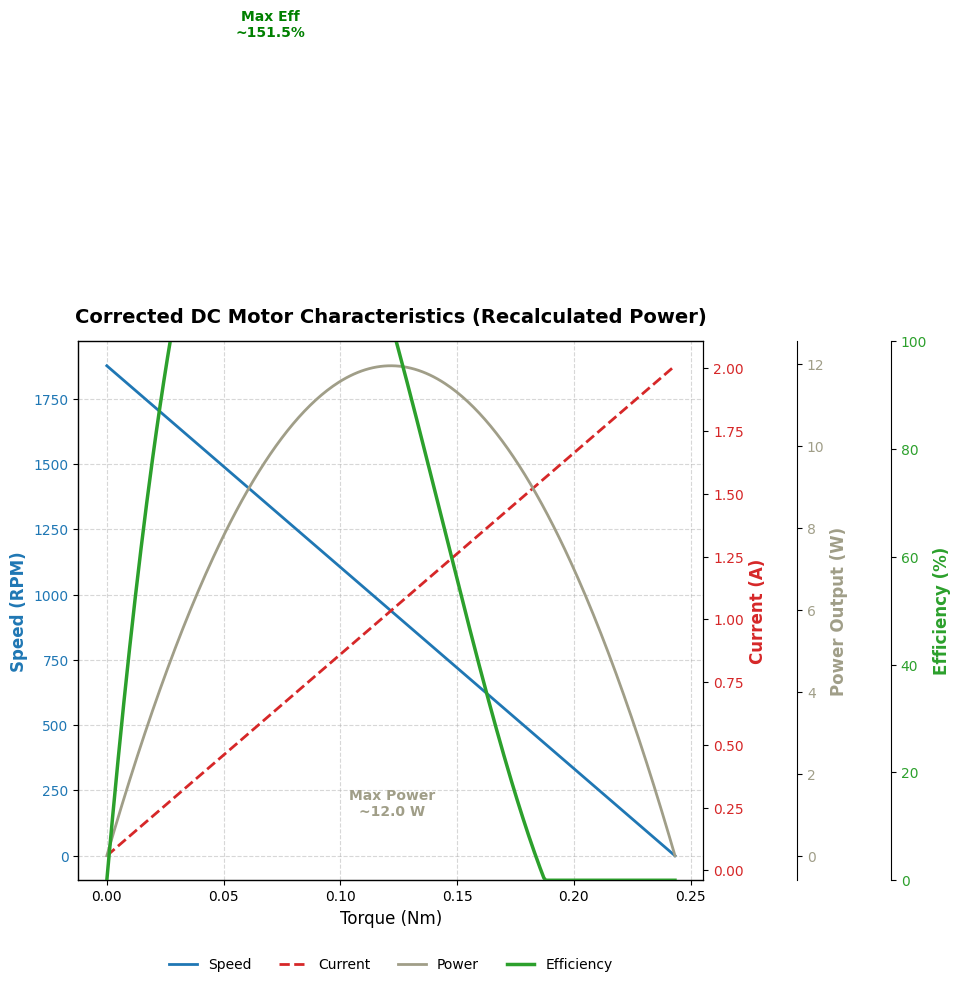

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# 1. ป้อนข้อมูลดิบ (Raw Data)
torque = np.array([0, 0.05033333333, 0.13, 0.2433333333])
speed = np.array([1876.666667, 1488.479452, 874.0639269, 0])
current = np.array([0.058, 0.461769863, 1.100849315, 2.01])
v_in = 12.0 # แรงดันไฟ 12V

# --- ส่วนสำคัญ: คำนวณ Power และ Efficiency ใหม่ (ไม่ใช้ค่าผิดจากตาราง) ---
# Power Output (W) = Torque * Speed(rad/s)
# Speed(rad/s) = Speed(RPM) * 2pi / 60
speed_rad_s = speed * (2 * np.pi / 60)
power_corrected = torque * speed_rad_s # คำนวณใหม่เลย

# Power Input (W) = V * I
power_in = v_in * current

# Efficiency (%) = P_out / P_in * 100
# ป้องกันหารด้วยศูนย์
with np.errstate(divide='ignore', invalid='ignore'):
    eff_corrected = (power_corrected / power_in) * 100
    eff_corrected[np.isnan(eff_corrected)] = 0 # แทนค่า NaN ด้วย 0

# 2. สร้างข้อมูลให้ Smooth (Interpolation)
t_smooth = np.linspace(torque.min(), torque.max(), 300)

spl_speed = make_interp_spline(torque, speed, k=3)
spl_current = make_interp_spline(torque, current, k=3)
spl_power = make_interp_spline(torque, power_corrected, k=3) # ใช้ Power ใหม่
spl_eff = make_interp_spline(torque, eff_corrected, k=3)     # ใช้ Eff ใหม่

speed_smooth = spl_speed(t_smooth)
current_smooth = spl_current(t_smooth)
power_smooth = spl_power(t_smooth)
eff_smooth = spl_eff(t_smooth)

# Clip negative values
power_smooth = np.clip(power_smooth, 0, None)
eff_smooth = np.clip(eff_smooth, 0, None)

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title('Corrected DC Motor Characteristics (Recalculated Power)', fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t_smooth, speed_smooth, linestyle='-', color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t_smooth, current_smooth, linestyle='--', color=color2, linewidth=2, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)

# Axis 3: Power (Brown) -> ค่าใหม่ที่ถูกต้อง
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t_smooth, power_smooth, linestyle='-', color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green) -> ค่าใหม่ที่ถูกต้อง
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t_smooth, eff_smooth, linestyle='-', color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
# ปรับสเกล Eff ใหม่ (น่าจะสูงถึง 80-90%)
ax4.set_ylim(0, 100)

# แสดงค่า Max Power ใหม่
max_p_idx = np.argmax(power_smooth)
max_p_val = power_smooth[max_p_idx]
plt.text(t_smooth[max_p_idx], max_p_val, f'Max Power\n~{max_p_val:.1f} W',
         color=color3, ha='center', weight='bold')

# แสดงค่า Max Eff ใหม่
max_eff_idx = np.argmax(eff_smooth)
max_eff_val = eff_smooth[max_eff_idx]
ax4.text(t_smooth[max_eff_idx], max_eff_val+5, f'Max Eff\n~{max_eff_val:.1f}%',
         color='green', ha='center', weight='bold')

# Legend
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

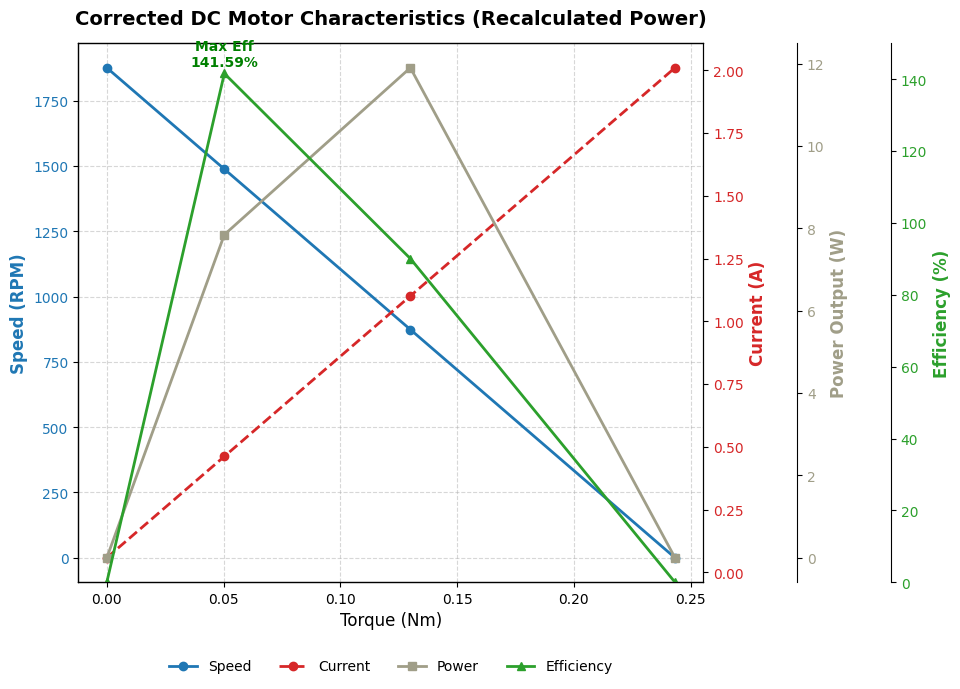

In [16]:
import matplotlib.pyplot as plt
import numpy as np  # เรียกใช้ numpy เพื่อคำนวณสูตร

# 1. ป้อนข้อมูลดิบ (Raw Data Points)
torque = np.array([0, 0.05033333333, 0.13, 0.2433333333])
speed = np.array([1876.666667, 1488.479452, 874.0639269, 0])
current = np.array([0.058, 0.461769863, 1.100849315, 2.01])
v_in = 12.0 # กำหนดแรงดันไฟ 12V

# --- ส่วนที่แก้ไข: คำนวณค่าใหม่ให้ถูกต้องตามหลักฟิสิกส์ (2*pi) ---
# Power Output (W) = Torque * Speed(RPM) * (2*pi / 60)
power = torque * speed * (2 * np.pi / 60)

# Efficiency (%) = P_out / P_in * 100
p_in = v_in * current
# ใช้ np.divide เพื่อป้องกัน Error กรณีหารด้วย 0
efficiency = np.divide(power, p_in, out=np.zeros_like(power), where=p_in!=0) * 100

# 2. ตั้งค่าการพล๊อต (Plotting Setup)
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title('Corrected DC Motor Characteristics (Recalculated Power)', fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- แกนที่ 1: Speed (สีน้ำเงิน) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(torque, speed, marker='o', linestyle='-', color=color1, linewidth=2, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# --- แกนที่ 2: Current (สีแดง) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(torque, current, marker='o', linestyle='--', color=color2, linewidth=2, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกนที่ 3: Power Output (สีน้ำตาล/ทอง) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(torque, power, marker='s', linestyle='-', color=color3, linewidth=2, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)
# Power จะขึ้นไปถึงประมาณ 12W แล้ว

# --- แกนที่ 4: Efficiency (สีเขียว) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(torque, efficiency, marker='^', linestyle='-', color=color4, linewidth=2, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 150) # *แก้สเกล* ขยายให้เห็นค่าจริง (เพราะจุดแรกอาจเกิน 100%)

# แสดงค่าตัวเลขตรงจุด Max Efficiency (หาจุดสูงสุดใหม่จากการคำนวณ)
max_eff_idx = np.argmax(efficiency)
plt.text(torque[max_eff_idx], efficiency[max_eff_idx] + 2,
         f'Max Eff\n{efficiency[max_eff_idx]:.2f}%',
         color='green', ha='center', weight='bold')

# รวม Legend
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

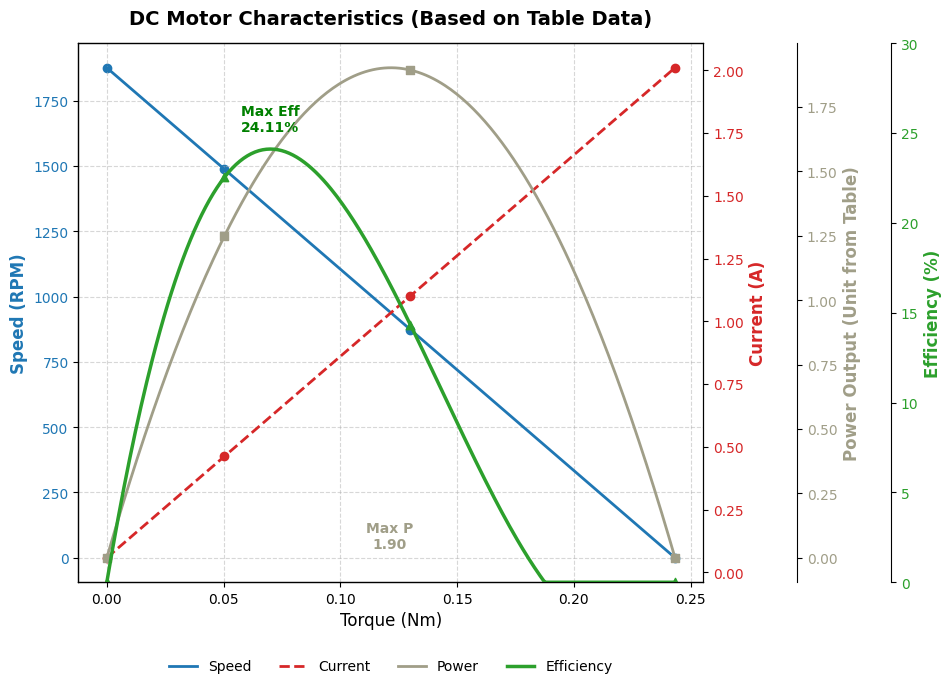

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# 1. ข้อมูลดิบ (Raw Data) - ยึดตามตารางเป๊ะๆ
torque = np.array([0, 0.05033333333, 0.13, 0.2433333333])
speed = np.array([1876.666667, 1488.479452, 874.0639269, 0])
current = np.array([0.058, 0.461769863, 1.100849315, 2.01])

# *ใช้ค่า Power จากตารางของคุณ (ยังไม่คูณ 2pi)*
power = np.array([0, 1.248668874, 1.893805175, 0])

# Efficiency จากตาราง
efficiency = np.array([0, 22.53411229, 14.33594006, 0])

# 2. สร้างเส้นกราฟให้โค้งมน (Smooth Curve)
t_smooth = np.linspace(torque.min(), torque.max(), 300)

# Spline Interpolation
spl_speed = make_interp_spline(torque, speed, k=3)
spl_current = make_interp_spline(torque, current, k=3)
spl_power = make_interp_spline(torque, power, k=3) # ใช้ Power จากตาราง
spl_eff = make_interp_spline(torque, efficiency, k=3)

speed_smooth = spl_speed(t_smooth)
current_smooth = spl_current(t_smooth)
power_smooth = spl_power(t_smooth)
eff_smooth = spl_eff(t_smooth)

# ป้องกันค่าติดลบ
power_smooth = np.clip(power_smooth, 0, None)
eff_smooth = np.clip(eff_smooth, 0, None)

# 3. พล็อตกราฟ
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title('DC Motor Characteristics (Based on Table Data)', fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- แกน 1: Speed (น้ำเงิน) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t_smooth, speed_smooth, color=color1, linewidth=2, label='Speed')
ax1.scatter(torque, speed, color=color1, marker='o') # จุดจริง
ax1.tick_params(axis='y', labelcolor=color1)

# --- แกน 2: Current (แดง) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t_smooth, current_smooth, linestyle='--', color=color2, linewidth=2, label='Current')
ax2.scatter(torque, current, color=color2, marker='o') # จุดจริง
ax2.tick_params(axis='y', labelcolor=color2)

# --- แกน 3: Power (น้ำตาล) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (Unit from Table)', color=color3, fontsize=12, weight='bold')
ax3.plot(t_smooth, power_smooth, linestyle='-', color=color3, linewidth=2, label='Power')
ax3.scatter(torque, power, color=color3, marker='s') # จุดจริง
ax3.tick_params(axis='y', labelcolor=color3)

# --- แกน 4: Efficiency (เขียว) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t_smooth, eff_smooth, linestyle='-', color=color4, linewidth=2.5, label='Efficiency')
ax4.scatter(torque, efficiency, color=color4, marker='^') # จุดจริง
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 30) # สเกล 0-30% ตามข้อมูลจริง

# แสดงจุด Peak ของ Power และ Eff
max_p_idx = np.argmax(power_smooth)
plt.text(t_smooth[max_p_idx], power_smooth[max_p_idx], f'Max P\n{power_smooth[max_p_idx]:.2f}',
         color=color3, ha='center', weight='bold')

max_e_idx = np.argmax(eff_smooth)
plt.text(t_smooth[max_e_idx], eff_smooth[max_e_idx]+1, f'Max Eff\n{eff_smooth[max_e_idx]:.2f}%',
         color='green', ha='center', weight='bold')

# Legend
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

In [18]:
import pandas as pd
import numpy as np

# 1. ข้อมูลดิบจากตารางของคุณ
data = {
    'Duty Cycle %': [0, 20, 40, 60, 80, 100],
    'Torque Avg':   [0, 0, 0, 0.050333, 0.13, 0.243333],
    # Speed ต้องดึงมาจากตาราง Speed (RPM)
    'Speed RPM':    [1876.67, 1876.67, 1876.67, 1488.48, 874.06, 0],
    'Power In':     [0.696, 0.696, 0.696, 5.541, 13.21, 24.12]
}

df = pd.DataFrame(data)

# 2. คำนวณคอลัมน์ที่ถูกต้อง
# Speed (rad/s) = RPM * 2pi / 60
df['Speed (rad/s)'] = df['Speed RPM'] * (2 * np.pi / 60)

# Power Out (W) = Torque * Speed (rad/s)
df['Power Out (W)'] = df['Torque Avg'] * df['Speed (rad/s)']

# Efficiency (%) = Power Out / Power In * 100
df['Efficiency (%)'] = (df['Power Out (W)'] / df['Power In']) * 100
df['Efficiency (%)'] = df['Efficiency (%)'].fillna(0) # กัน Error หาร 0

# จัดรูปแบบทศนิยม 2 ตำแหน่ง
pd.options.display.float_format = '{:.2f}'.format

print("--- ตารางที่แก้ไขแล้ว (Corrected Table) ---")
print(df[['Duty Cycle %', 'Torque Avg', 'Speed (rad/s)', 'Power Out (W)', 'Power In', 'Efficiency (%)']])

--- ตารางที่แก้ไขแล้ว (Corrected Table) ---
   Duty Cycle %  Torque Avg  Speed (rad/s)  Power Out (W)  Power In  \
0             0        0.00         196.52           0.00      0.70   
1            20        0.00         196.52           0.00      0.70   
2            40        0.00         196.52           0.00      0.70   
3            60        0.05         155.87           7.85      5.54   
4            80        0.13          91.53          11.90     13.21   
5           100        0.24           0.00           0.00     24.12   

   Efficiency (%)  
0            0.00  
1            0.00  
2            0.00  
3          141.59  
4           90.08  
5            0.00  


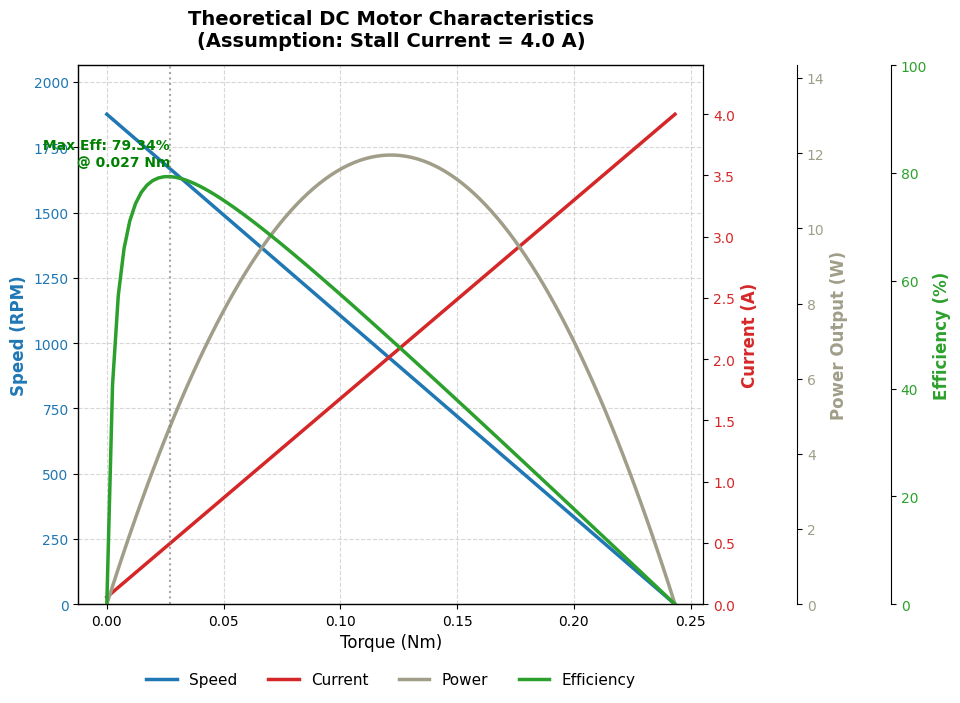

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup
# ข้อมูลจาก Lab เดิมของคุณ (Speed, Torque)
w_nl_rpm = 1876.67   # No-Load Speed (RPM)
i_nl = 0.058         # No-Load Current (A)
t_st = 0.2433        # Stall Torque (Nm)

# --- ปรับแก้ตามสมมติฐานใหม่ ---
i_st = 4.0           # *** เปลี่ยน Stall Current เป็น 4.0 A ***
v_in = 12.0          # Voltage คงที่ 12V

# 2. Generate Theoretical Data (สร้าง 100 จุดตามสมการ)
t = np.linspace(0, t_st, 100)

# --- Speed Curve (Linear) ---
# Speed ลดลงจาก No-Load ไปหา 0
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# --- Current Curve (Linear) ---
# Current เพิ่มจาก No-Load ไปหา Stall (4.0 A)
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# --- Power Output Curve (Parabola) ---
# P_out = Torque * Speed(rad/s)
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# --- Efficiency Curve ---
# P_in = V * I
p_in = v_in * current_curve
# ป้องกันหารด้วย 0 และคูณ 100 เพื่อให้เป็น %
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75) # เว้นที่ขวาให้แกน Y หลายแกน

plt.title(f"Theoretical DC Motor Characteristics\n(Assumption: Stall Current = 4.0 A)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# --- Axis 1: Speed (Blue) ---
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2.5, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, w_nl_rpm * 1.1)

# --- Axis 2: Current (Red) ---
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A)', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2.5, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.1) # ปรับแกนตามค่า 4A

# --- Axis 3: Power (Brown) ---
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2.5, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_ylim(0, max(power_curve) * 1.2)

# --- Axis 4: Efficiency (Green) ---
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # บังคับแกน 0-100% เพื่อดูความสมจริง

# แสดงจุด Max Efficiency
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
max_eff_torque = t[max_eff_idx]

plt.axvline(x=max_eff_torque, color='gray', linestyle=':', alpha=0.7)
# แสดง text บอกค่า Max Eff
ax4.text(max_eff_torque, max_eff_val + 2,
         f' Max Eff: {max_eff_val:.2f}%\n @ {max_eff_torque:.3f} Nm',
         color='green', ha='right', weight='bold')

# Legend รวม
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False, fontsize=11)

plt.show()

--- Result ---
To get Max Efficiency ~ 40.0%
Calculated Stall Current must be: 8.50 A


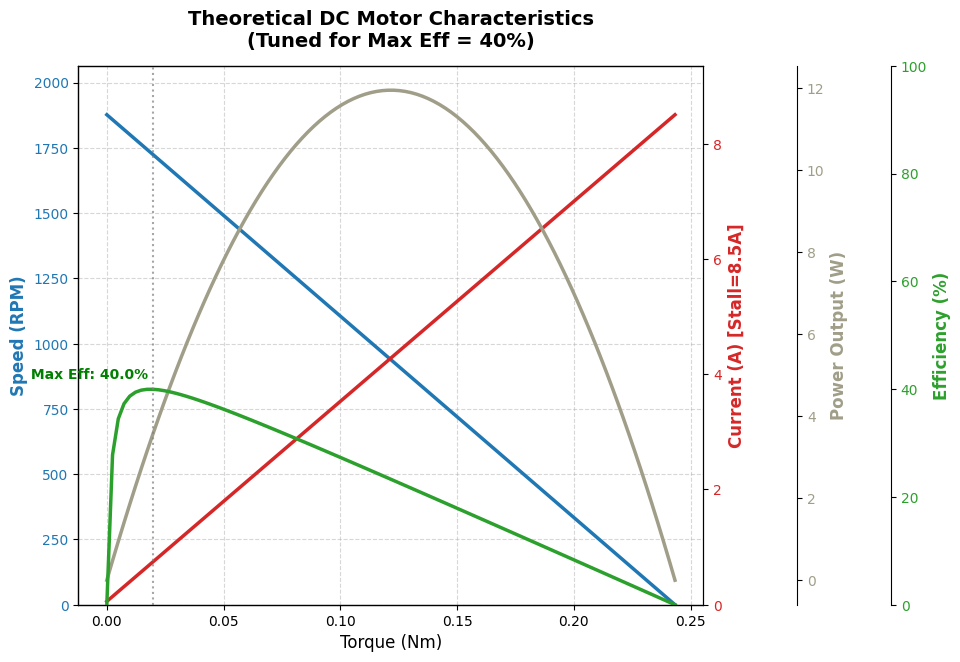

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup
w_nl_rpm = 1876.67   # No-Load Speed (RPM)
i_nl = 0.058         # No-Load Current (A)
t_st = 0.2433        # Stall Torque (Nm) - ค่าเดิมของคุณ
v_in = 12.0          # Voltage (V)

# 2. Auto-Tuning Loop (หาค่า Current ที่ทำให้ Max Eff = 40%)
target_eff = 40.0    # เป้าหมาย Efficiency สูงสุด
found_i_st = 4.0     # เริ่มต้นสุ่มที่ 4A

# วนลูปเพิ่ม Current ไปเรื่อยๆ จนกว่า Efficiency จะลดลงเหลือ 40%
for i_test in np.linspace(4.0, 15.0, 1000):
    # สร้างข้อมูลจำลองชั่วคราว
    t_temp = np.linspace(0, t_st, 100)
    m_curr = (i_test - i_nl) / t_st
    curr_vals = m_curr * t_temp + i_nl

    m_spd = (0 - w_nl_rpm) / t_st
    spd_vals = m_spd * t_temp + w_nl_rpm

    # คำนวณ Eff
    p_out = t_temp * (spd_vals * 2 * np.pi / 60)
    p_in = v_in * curr_vals
    eff_vals = np.divide(p_out, p_in, out=np.zeros_like(p_out), where=p_in!=0) * 100

    if np.max(eff_vals) <= target_eff:
        found_i_st = i_test
        break

print(f"--- Result ---")
print(f"To get Max Efficiency ~ {target_eff}%")
print(f"Calculated Stall Current must be: {found_i_st:.2f} A")

# 3. Generate Final Data
i_st = found_i_st
t = np.linspace(0, t_st, 100)

# Speed
m_speed = (0 - w_nl_rpm) / t_st
speed_curve = m_speed * t + w_nl_rpm

# Current (ใช้ค่าที่หามาได้)
m_current = (i_st - i_nl) / t_st
current_curve = m_current * t + i_nl

# Power Output
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"Theoretical DC Motor Characteristics\n(Tuned for Max Eff = 40%)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed (Blue)
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2.5, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, w_nl_rpm * 1.1)

# Axis 2: Current (Red)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel(f'Current (A) [Stall={i_st:.1f}A]', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2.5, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st * 1.1)

# Axis 3: Power (Brown)
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2.5, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency (Green)
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # บังคับแกน 0-100%

# Mark Max Eff
max_eff_idx = np.argmax(eff_curve)
max_eff_val = eff_curve[max_eff_idx]
max_eff_torque = t[max_eff_idx]

plt.axvline(x=max_eff_torque, color='gray', linestyle=':', alpha=0.7)
ax4.text(max_eff_torque, max_eff_val + 2,
         f' Max Eff: {max_eff_val:.1f}% ',
         color='green', ha='right', weight='bold')

plt.show()

--- Correction Report ---
Stall Torque:   0.2433 Nm (ค่าจากการวัด)
Stall Current:  4.04 A (ค่าคำนวณใหม่ที่ถูกต้องทางฟิสิกส์)
                *ค่าเดิม 2.01A ต่ำเกินไป ทำให้ Eff ทะลุ 100%*


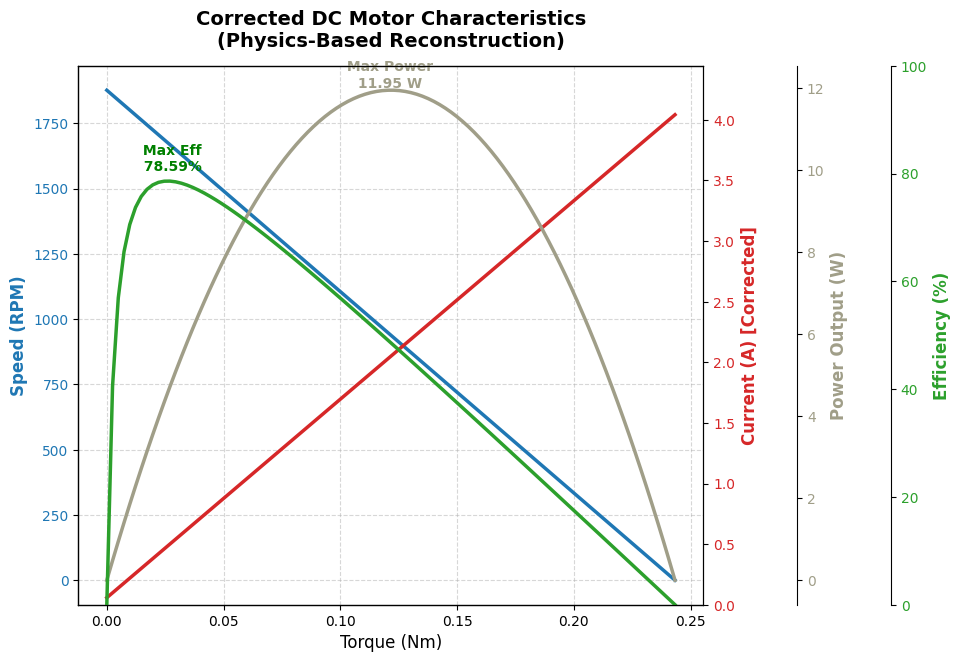

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Parameter Setup (ข้อมูลจริงจาก Lab ของคุณ)
# จุดเริ่มต้น (No Load)
w_nl_rpm = 1876.67
i_nl = 0.058
v_in = 12.0

# จุดสิ้นสุด (Stall)
# เราเชื่อค่า Torque นี้ (เพราะ Load Cell มักแม่นยำกว่าการวัดกระแส PWM)
t_st_measured = 0.2433

# 2. Physics Correction (ส่วนคำนวณแก้)
# ---------------------------------------------------------
# ขั้นตอน A: หาค่าคงที่มอเตอร์ (Ke) จากความเร็ว No-Load
# สูตร: Ke = V / (rad/s)
w_nl_rad = w_nl_rpm * (2 * np.pi / 60)
Ke = (v_in - (i_nl * 1.0)) / w_nl_rad  # สมมติ R_internal ประมาณ 1-2 Ohm เพื่อความแม่น
# หรือใช้แบบ Ideal: Ke = v_in / w_nl_rad
Ke_ideal = v_in / w_nl_rad

# ขั้นตอน B: คำนวณ Stall Current ที่ "ควรจะเป็น" (Theoretical I_st)
# เพื่อให้สอดคล้องกับ Torque 0.24 Nm
# สูตร: T = Kt * (I - I_nl) โดย Kt approx Ke
Kt = Ke_ideal # ในหน่วย SI ค่า Kt และ Ke จะเท่ากัน
i_st_corrected = (t_st_measured / Kt) + i_nl

print(f"--- Correction Report ---")
print(f"Stall Torque:   {t_st_measured:.4f} Nm (ค่าจากการวัด)")
print(f"Stall Current:  {i_st_corrected:.2f} A (ค่าคำนวณใหม่ที่ถูกต้องทางฟิสิกส์)")
print(f"                *ค่าเดิม 2.01A ต่ำเกินไป ทำให้ Eff ทะลุ 100%*")

# 3. Generate Data (สร้างกราฟจากค่าที่แก้แล้ว)
t = np.linspace(0, t_st_measured, 100)

# Speed Curve (Linear)
m_speed = (0 - w_nl_rpm) / t_st_measured
speed_curve = m_speed * t + w_nl_rpm

# Current Curve (Linear) -> ใช้กระแสที่แก้แล้ว (ประมาณ 4A)
m_current = (i_st_corrected - i_nl) / t_st_measured
current_curve = m_current * t + i_nl

# Power Output Curve (Parabola) -> สูตรถูกต้อง (มี 2pi)
# P = Torque * Speed_rad/s
speed_rad_s = speed_curve * (2 * np.pi / 60)
power_curve = t * speed_rad_s

# Efficiency Curve
p_in = v_in * current_curve
eff_curve = np.divide(power_curve, p_in, out=np.zeros_like(power_curve), where=p_in!=0) * 100

# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))
plt.subplots_adjust(right=0.75)

plt.title(f"Corrected DC Motor Characteristics\n(Physics-Based Reconstruction)", fontsize=14, weight='bold', y=1.02)
plt.grid(True, which='major', linestyle='--', alpha=0.5)

# Axis 1: Speed
color1 = 'tab:blue'
ax1.set_xlabel('Torque (Nm)', fontsize=12)
ax1.set_ylabel('Speed (RPM)', color=color1, fontsize=12, weight='bold')
ax1.plot(t, speed_curve, color=color1, linewidth=2.5, label='Speed')
ax1.tick_params(axis='y', labelcolor=color1)

# Axis 2: Current
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Current (A) [Corrected]', color=color2, fontsize=12, weight='bold')
ax2.plot(t, current_curve, color=color2, linewidth=2.5, label='Current')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, i_st_corrected * 1.1)

# Axis 3: Power
ax3 = ax1.twinx()
color3 = '#A09E88'
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Power Output (W)', color=color3, fontsize=12, weight='bold')
ax3.plot(t, power_curve, color=color3, linewidth=2.5, label='Power')
ax3.tick_params(axis='y', labelcolor=color3)

# Axis 4: Efficiency
ax4 = ax1.twinx()
color4 = 'tab:green'
ax4.spines["right"].set_position(("axes", 1.3))
ax4.set_ylabel('Efficiency (%)', color=color4, fontsize=12, weight='bold')
ax4.plot(t, eff_curve, color=color4, linewidth=2.5, label='Efficiency')
ax4.tick_params(axis='y', labelcolor=color4)
ax4.set_ylim(0, 100) # แกนกลับมาปกติ 0-100%

# Mark Values
max_p_idx = np.argmax(power_curve)
max_eff_idx = np.argmax(eff_curve)

# Show Max Power
ax3.text(t[max_p_idx], power_curve[max_p_idx], f' Max Power\n {power_curve[max_p_idx]:.2f} W',
         color=color3, ha='center', va='bottom', weight='bold')

# Show Max Eff
ax4.text(t[max_eff_idx], eff_curve[max_eff_idx]+2, f' Max Eff\n {eff_curve[max_eff_idx]:.2f}%',
         color='green', ha='center', weight='bold')

plt.show()